In [1]:
#manejo de datos
import pandas as pd
import numpy as np

#gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import PercentFormatter


#creación de modelos
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler

#pruebas paramétricas
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu

from joblib import Parallel, delayed
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LassoLars, OrthogonalMatchingPursuit, HuberRegressor, BayesianRidge, PassiveAggressiveRegressor, Lars
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import time
import pandas as pd




import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold



from joblib import Parallel, delayed
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import time
import pandas as pd

#prevenir warnings
import warnings


In [2]:
np.set_printoptions(precision=6, suppress=True)
pd.set_option('display.float_format', '{:.6f}'.format)
warnings.filterwarnings('ignore')

# Importar datos desde un csv con pandas

In [3]:
loan_data = pd.read_csv('C:/Users/diego/OneDrive/Escritorio/accepted_2007_to_2018Q4.csv')

<h1 id="exploracion">Exploración de los datos</h1>

In [4]:
pd.options.display.max_columns = None
loan_data.head()

id  member_id    loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN  3600.000000  3600.000000      3600.000000   36 months   
1  68355089        NaN 24700.000000 24700.000000     24700.000000   36 months   
2  68341763        NaN 20000.000000 20000.000000     20000.000000   60 months   
3  66310712        NaN 35000.000000 35000.000000     35000.000000   60 months   
4  68476807        NaN 10400.000000 10400.000000     10400.000000   60 months   

   int_rate  installment grade sub_grade                    emp_title  \
0 13.990000   123.030000     C        C4                      leadman   
1 11.990000   820.280000     C        C1                     Engineer   
2 10.780000   432.660000     B        B4                 truck driver   
3 14.850000   829.900000     C        C5  Information Systems Officer   
4 22.450000   289.910000     F        F1          Contract Specialist   

  emp_length home_ownership    annual_inc verification_status   issue_d  \
0  10+ years       MORTGAGE  55000.000000        Not Verified  Dec-2015   
1  10+ years       MORTGAGE  65000.000000        Not Verified  Dec-2015   
2  10+ years       MORTGAGE  63000.000000        Not Verified  Dec-2015   
3  10+ years       MORTGAGE 110000.000000     Source Verified  Dec-2015   
4    3 years       MORTGAGE 104433.000000     Source Verified  Dec-2015   

  loan_status pymnt_plan                                                url  \
0  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
1  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
2  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
3     Current          n  https://lendingclub.com/browse/loanDetail.acti...   
4  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   

  desc             purpose               title zip_code addr_state       dti  \
0  NaN  debt_consolidation  Debt consolidation    190xx         PA  5.910000   
1  NaN      small_business            Business    577xx         SD 16.060000   
2  NaN    home_improvement                 NaN    605xx         IL 10.780000   
3  NaN  debt_consolidation  Debt consolidation    076xx         NJ 17.060000   
4  NaN      major_purchase      Major purchase    174xx         PA 25.370000   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0     0.000000         Aug-2003      675.000000       679.000000   
1     1.000000         Dec-1999      715.000000       719.000000   
2     0.000000         Aug-2000      695.000000       699.000000   
3     0.000000         Sep-2008      785.000000       789.000000   
4     1.000000         Jun-1998      695.000000       699.000000   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0        1.000000               30.000000                     NaN  7.000000   
1        4.000000                6.000000                     NaN 22.000000   
2        0.000000                     NaN                     NaN  6.000000   
3        0.000000                     NaN                     NaN 13.000000   
4        3.000000               12.000000                     NaN 12.000000   

   pub_rec    revol_bal  revol_util  total_acc initial_list_status  \
0 0.000000  2765.000000   29.700000  13.000000                   w   
1 0.000000 21470.000000   19.200000  38.000000                   w   
2 0.000000  7869.000000   56.200000  18.000000                   w   
3 0.000000  7802.000000   11.600000  17.000000                   w   
4 0.000000 21929.000000   64.500000  35.000000                   w   

     out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0     0.000000       0.000000  4421.723917      4421.720000      3600.000000   
1     0.000000       0.000000 25679.660000     25679.660000     24700.000000   
2     0.000000       0.000000 22705.924294     22705.920000     20000.000000   
3 15897.650000   15897.650000 31464.010000     3146

In [5]:
loan_data.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count   0.000000 2260668.000000 2260668.000000   2260668.000000   
mean         NaN   15046.931228   15041.664057     15023.437745   
std          NaN    9190.245488    9188.413022      9192.331679   
min          NaN     500.000000     500.000000         0.000000   
25%          NaN    8000.000000    8000.000000      8000.000000   
50%          NaN   12900.000000   12875.000000     12800.000000   
75%          NaN   20000.000000   20000.000000     20000.000000   
max          NaN   40000.000000   40000.000000     40000.000000   

            int_rate    installment       annual_inc            dti  \
count 2260668.000000 2260668.000000   2260664.000000 2258957.000000   
mean       13.092829     445.806823     77992.428687      18.824196   
std         4.832138     267.173535    112696.199574      14.183329   
min         5.310000       4.930000         0.000000      -1.000000   
25%         9.490000     251.650000     46000.000000      11.890000   
50%        12.620000     377.990000     65000.000000      17.840000   
75%        15.990000     593.320000     93000.000000      24.490000   
max        30.990000    1719.830000 110000000.000000     999.000000   

         delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
count 2260639.000000  2260668.000000   2260668.000000  2260638.000000   
mean        0.306879      698.588205       702.588400        0.576835   
std         0.867230       33.010376        33.011245        0.885963   
min         0.000000      610.000000       614.000000        0.000000   
25%         0.000000      675.000000       679.000000        0.000000   
50%         0.000000      690.000000       694.000000        0.000000   
75%         0.000000      715.000000       719.000000        1.000000   
max        58.000000      845.000000       850.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count          1102166.000000           359156.000000 2260639.000000   
mean                34.540916               72.312842      11.612402   
std                 21.900471               26.464094       5.640861   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               55.000000       8.000000   
50%                 31.000000               74.000000      11.000000   
75%                 50.000000               92.000000      14.000000   
max                226.000000              129.000000     101.000000   

             pub_rec      revol_bal     revol_util      total_acc  \
count 2260639.000000 2260668.000000 2258866.000000 2260639.000000   
mean        0.197528   16658.458078      50.337696      24.162552   
std         0.570515   22948.305028      24.713073      11.987528   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000    5950.000000      31.500000      15.000000   
50%         0.000000   11324.000000      50.300000      22.000000   
75%         0.000000   20246.000000      69.400000      31.000000   
max        86.000000 2904836.000000     892.300000     176.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count 2260668.000000 2260668.000000 2260668.000000   2260668.000000   
mean     4206.891439    4205.965357   12082.556829     12064.394655   
std      7343.238522    7342.332972    9901.383185      9896.991745   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    4546.457500      4531.800000   
50%         0.000000       0.000000    9329.720000      9309.675000   
75%      6149.940000    6146.310000   16940.869373     16916.705000   
max     40000.000000   40000.000000   63296.877917     63296.880000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count   2260668.000000 2260668.000000      2260668.000000 2260668.000000   
mean       9505.771588    2431.387654     

In [6]:
#tipo de dato en cada columna
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [7]:
#Mostramos de manera ordena el % de valores nulos en cada columna 
for col in loan_data:
    missing = round(loan_data[col].isna().sum() / len(loan_data) * 100,2)
    print(f"Total de valores faltantes en {col} feature: {missing} %")

Total de valores faltantes en id feature: 0.0 %
Total de valores faltantes en member_id feature: 100.0 %
Total de valores faltantes en loan_amnt feature: 0.0 %
Total de valores faltantes en funded_amnt feature: 0.0 %
Total de valores faltantes en funded_amnt_inv feature: 0.0 %
Total de valores faltantes en term feature: 0.0 %
Total de valores faltantes en int_rate feature: 0.0 %
Total de valores faltantes en installment feature: 0.0 %
Total de valores faltantes en grade feature: 0.0 %
Total de valores faltantes en sub_grade feature: 0.0 %
Total de valores faltantes en emp_title feature: 7.39 %
Total de valores faltantes en emp_length feature: 6.5 %
Total de valores faltantes en home_ownership feature: 0.0 %
Total de valores faltantes en annual_inc feature: 0.0 %
Total de valores faltantes en verification_status feature: 0.0 %
Total de valores faltantes en issue_d feature: 0.0 %
Total de valores faltantes en loan_status feature: 0.0 %
Total de valores faltantes en pymnt_plan feature: 0.

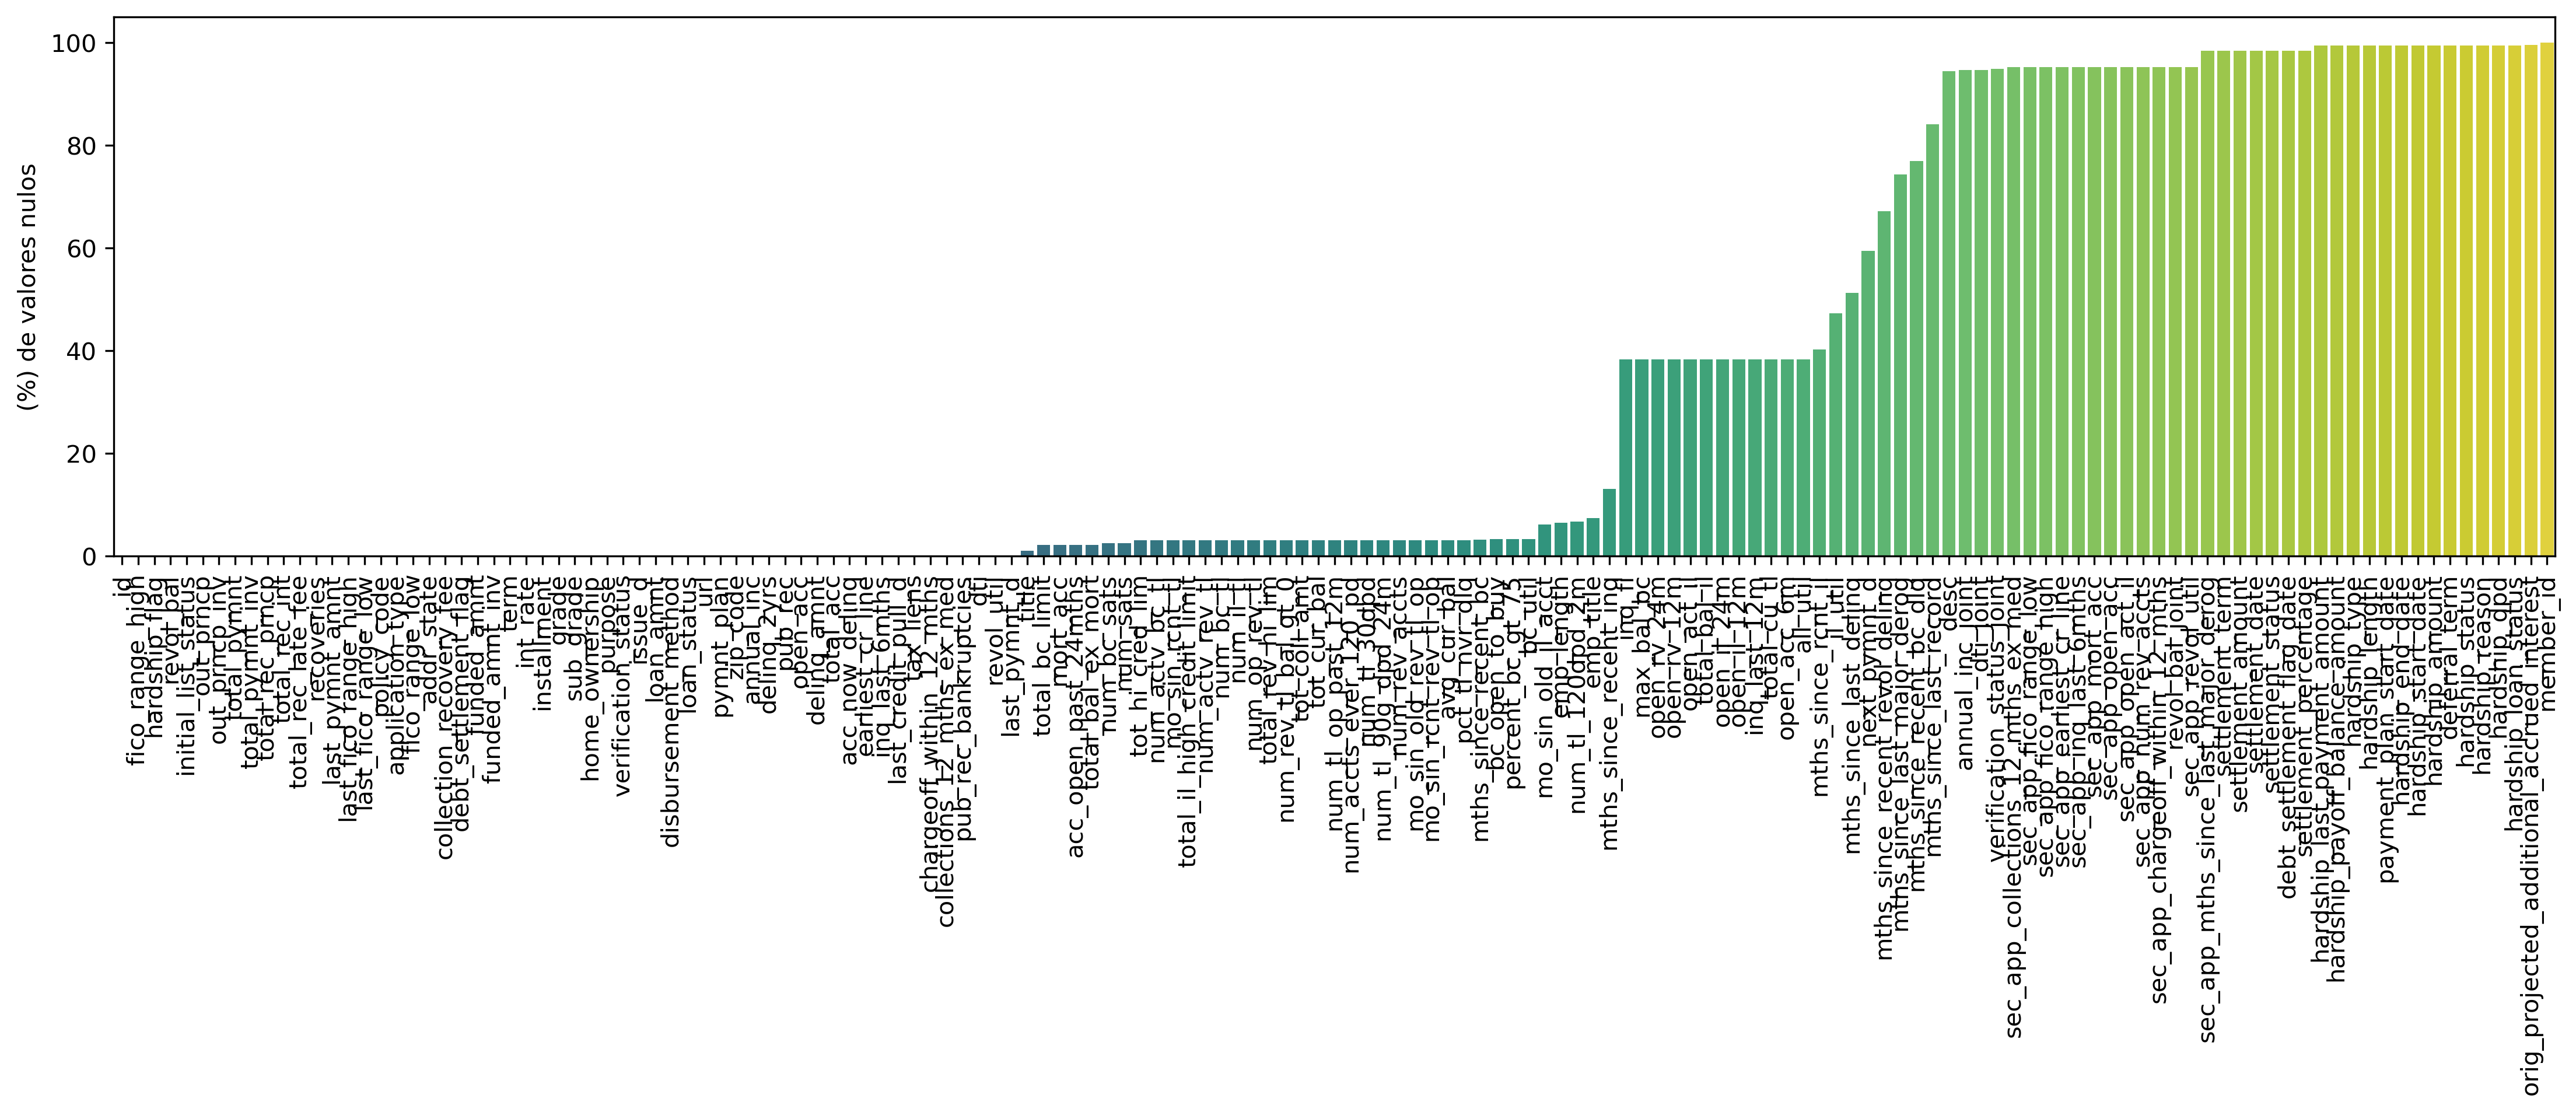

In [8]:
plt.figure(figsize=(18,4),dpi=300) 

sns.barplot(y=((loan_data.isnull().sum()/len(loan_data))*100).sort_values(), x=((loan_data.isnull().sum()/len(loan_data))*100).sort_values().index, palette='viridis') 
plt.xticks(rotation=90)
plt.ylabel('(%) de valores nulos'); 

In [9]:
# obtiene las columnas que tenga mas de 50% de datos nulos
na_values = loan_data.isnull().mean()
na_values[na_values>0.50]

member_id                                    1.000000
desc                                         0.944235
mths_since_last_delinq                       0.512467
mths_since_last_record                       0.841131
next_pymnt_d                                 0.595100
mths_since_last_major_derog                  0.743100
annual_inc_joint                             0.946605
dti_joint                                    0.946607
verification_status_joint                    0.948808
mths_since_recent_bc_dlq                     0.770115
mths_since_recent_revol_delinq               0.672509
revol_bal_joint                              0.952218
sec_app_fico_range_low                       0.952218
sec_app_fico_range_high                      0.952218
sec_app_earliest_cr_line                     0.952218
sec_app_inq_last_6mths                       0.952218
sec_app_mort_acc                             0.952218
sec_app_open_acc                             0.952218
sec_app_revol_util          

# Limpieza inicial de datos 

In [10]:

# elimina las columnas con mas de 50% de datos nulos
loan_data.dropna(thresh = loan_data.shape[0]*0.5, axis = 1, inplace = True)

'''
Vamos a eliminar  aquellas columnas redundantes y que no aportan información util , estadisticamente hablando.
[id, member_id, title, emp_title,url,policiy_code,zip_code]

también suprimimos las columnas numéricas sin relación con la probabilidad de impago
[ recoveries, collection_recovery_fee, total_rec_prncp, total_rec_late_fee]

Eliminamos las variables 'grade' y 'subgrade', ya que el grado de calidad de un crédito está directamente relacionado 
con la Probabilidad de Incumplimiento (PD). Si buscamos desarrollar un modelo de riesgo crediticio desde cero, 
no contaríamos con información sobre la calidad del crédito.

#variables que solo representan informmacion despues de que la calidad crediticia del prestamo ya se encuentra deteriodada y/o totalmente pagado
[last_fico_range_high,last_fico_range_low,debt_settlement_flag,total_pymnt_inv,total_pymnt,last_pymnt_amnt,total_rec_int]	
'''

loan_data.drop(columns = ['id', 'grade','sub_grade', 'emp_title', 'zip_code','url','policy_code', 'title',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee','last_fico_range_high','last_fico_range_low',
                          'debt_settlement_flag','last_pymnt_amnt','total_pymnt','total_pymnt_inv','total_rec_int'], inplace = True)

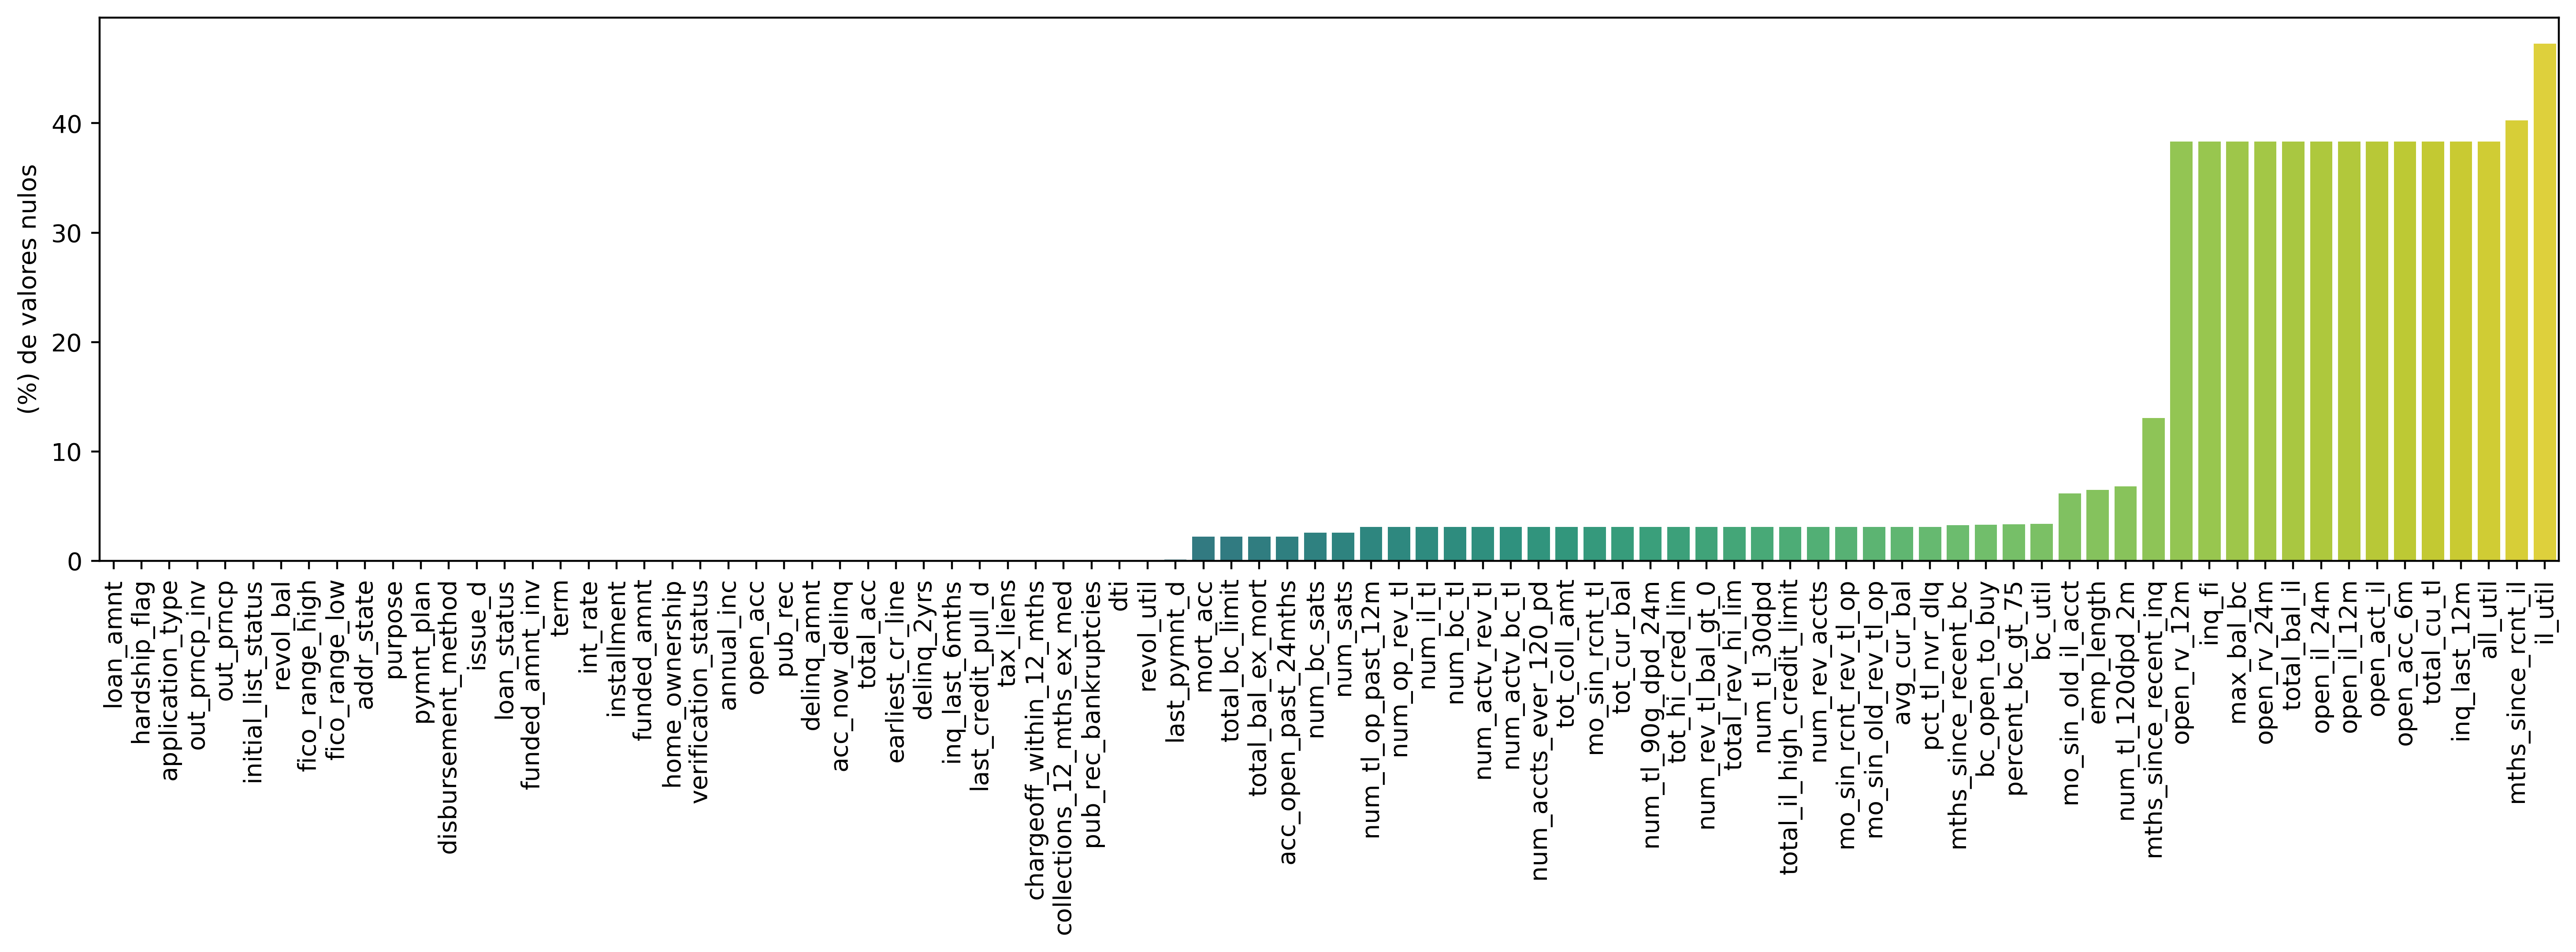

In [11]:
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((loan_data.isnull().sum()/len(loan_data))*100).sort_values(), x=((loan_data.isnull().sum()/len(loan_data))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('(%) de valores nulos');

In [12]:
#Para los datos numericos remplazamos los valores nulos por la media de la columna

for col in loan_data.select_dtypes(include = 'number'):
    loan_data[col].fillna(loan_data[col].mean(), inplace = True)
    
    

<h2 id=revision> Revisión variables categóricas  </h2>         

In [13]:
cat_cols = loan_data.select_dtypes('object').columns

for col in cat_cols: print(col, loan_data[col].nunique())



term 2
emp_length 11
home_ownership 6
verification_status 3
issue_d 139
loan_status 9
pymnt_plan 2
purpose 14
addr_state 51
earliest_cr_line 754
initial_list_status 2
last_pymnt_d 136
last_credit_pull_d 141
application_type 2
hardship_flag 2
disbursement_method 2


In [14]:
loan_data['term'].value_counts(normalize = True)

 36 months   0.712070
 60 months   0.287930
Name: term, dtype: float64

In [15]:
# Convertimos la columna term a numérica
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', '') )

In [16]:
loan_data['term'].value_counts(normalize = True)

36.000000   0.712070
60.000000   0.287930
Name: term, dtype: float64

In [17]:
loan_data['emp_length'].value_counts(normalize = True)

10+ years   0.353874
2 years     0.096358
< 1 year    0.089881
3 years     0.085513
1 year      0.070208
5 years     0.066090
4 years     0.064627
6 years     0.048552
7 years     0.043853
8 years     0.043484
9 years     0.037561
Name: emp_length, dtype: float64

In [18]:
# Convertimos la columna emp_length a numérica

loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('10+', str(10))
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])
loan_data['emp_length'].fillna(value = 0, inplace = True)


In [19]:
loan_data['emp_length'].value_counts(normalize = True)

10.000000   0.330873
0.000000    0.149037
2.000000    0.090095
3.000000    0.079954
1.000000    0.065645
5.000000    0.061794
4.000000    0.060426
6.000000    0.045397
7.000000    0.041003
8.000000    0.040657
9.000000    0.035120
Name: emp_length, dtype: float64

In [20]:
loan_data['home_ownership'].value_counts(normalize = True)

MORTGAGE   0.491647
RENT       0.395869
OWN        0.111939
ANY        0.000441
OTHER      0.000081
NONE       0.000024
Name: home_ownership, dtype: float64

In [21]:
loan_data['verification_status'].value_counts(normalize = True)

Source Verified   0.392022
Not Verified      0.329463
Verified          0.278515
Name: verification_status, dtype: float64

In [22]:
# vamos a transformar las columnas de fecha string fecha, a una diferencia de fechas en días
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

loan_data[date_cols].head()

#solo dejar earliest cr line
#issue_d obtener la diferencia entre el mayor y el menor

issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0  Dec-2015         Aug-2003     Jan-2019           Mar-2019
1  Dec-2015         Dec-1999     Jun-2016           Mar-2019
2  Dec-2015         Aug-2000     Jun-2017           Mar-2019
3  Dec-2015         Sep-2008     Feb-2019           Mar-2019
4  Dec-2015         Jun-1998     Jul-2016           Mar-2018

In [23]:
# Con base en la fecha del credito y su primera linea de credito obtenemos la diferencia en dias, para saber cuanto tiempo lleva el cliente con su primera linea de credito
#las variables de fecha restantes las eliminamos al no ser relevantes para el modelo 

def date_columns_days(df, columns, fecha_aux):
    # Convertir la columna fecha_aux a formato fecha solo una vez
    df[fecha_aux] = pd.to_datetime(df[fecha_aux], format="%b-%Y")
    
    for column in columns:
        # Convertir la columna actual a formato fecha
        df[column] = pd.to_datetime(df[column], format="%b-%Y")
        
        # Calcular la diferencia en días
        df['days_since_' + column] = ( df[fecha_aux]-df[column]).dt.days
        
        # Reemplazar valores negativos con el máximo de la columna
        max_days = df['days_since_' + column].max()
        df['days_since_' + column] = df['days_since_' + column].apply(lambda x: max_days if x < 0 else x)


date_columns_days(loan_data, ['earliest_cr_line'], 'issue_d')

loan_data['days_since_earliest_cr_line'].head()



0   4505.000000
1   5844.000000
2   5600.000000
3   2647.000000
4   6392.000000
Name: days_since_earliest_cr_line, dtype: float64

In [24]:
#eliminamos las columnas de fecha para reducir dimensionalidad
loan_data.drop(columns = date_cols, inplace = True)

In [25]:
loan_data['purpose'].value_counts(normalize = True)

debt_consolidation   0.565265
credit_card          0.228681
home_improvement     0.066554
other                0.061681
major_purchase       0.022314
medical              0.012159
small_business       0.010921
car                  0.010622
vacation             0.006867
moving               0.006813
house                0.006253
wedding              0.001042
renewable_energy     0.000639
educational          0.000188
Name: purpose, dtype: float64

In [26]:
loan_data['addr_state'].value_counts(normalize = True)

CA   0.139133
NY   0.082449
TX   0.082425
FL   0.071656
IL   0.040330
NJ   0.036773
PA   0.034034
OH   0.033234
GA   0.032820
VA   0.027848
NC   0.027748
MI   0.025997
MD   0.023890
AZ   0.023788
MA   0.022907
CO   0.021314
WA   0.020817
MN   0.017480
IN   0.016595
MO   0.015962
CT   0.015829
TN   0.015696
NV   0.014446
WI   0.013216
SC   0.012387
AL   0.012069
OR   0.011850
LA   0.011394
KY   0.009682
OK   0.009153
KS   0.008453
AR   0.007553
UT   0.006632
MS   0.005591
NM   0.005302
NH   0.004929
HI   0.004719
RI   0.004426
WV   0.003694
NE   0.003459
DE   0.002857
MT   0.002786
DC   0.002369
AK   0.002314
ME   0.002200
VT   0.002184
WY   0.002100
SD   0.002012
ID   0.001906
ND   0.001588
IA   0.000006
Name: addr_state, dtype: float64

In [27]:
loan_data['pymnt_plan'].value_counts(normalize = True)

n   0.999726
y   0.000274
Name: pymnt_plan, dtype: float64

In [28]:
#converimos la columna pymnt_plan a numerica
loan_data['pymnt_plan'] = loan_data['pymnt_plan'].map({'n': 0, 'y': 1})

In [29]:
loan_data['initial_list_status'].value_counts(normalize = True)

w   0.679209
f   0.320791
Name: initial_list_status, dtype: float64

In [30]:
#convertimos la columna initial_list_status a numerica
loan_data['initial_list_status'] = loan_data['initial_list_status'].map({'f': 0, 'w': 1})

In [31]:
loan_data['application_type'].value_counts(normalize = True)

Individual   0.946604
Joint App    0.053396
Name: application_type, dtype: float64

In [32]:
#convertimos la columna application_type a numerica

loan_data['application_type'] = loan_data['application_type'].map({'Individual': 0, 'Joint App': 1})

In [33]:
loan_data['hardship_flag'].value_counts(normalize = True)

N   0.999632
Y   0.000368
Name: hardship_flag, dtype: float64

In [34]:
#convertimos la columna hardship_flag a numerica

loan_data['hardship_flag'] = loan_data['hardship_flag'].map({'N': 0, 'Y': 1})

In [35]:
loan_data['disbursement_method'].value_counts(normalize = True)

Cash        0.965443
DirectPay   0.034557
Name: disbursement_method, dtype: float64

In [36]:
#convertimos la columna disbursement_method a numerica

loan_data['disbursement_method'] = loan_data['disbursement_method'].map({'Cash': 0, 'DirectPay': 1})

In [37]:
#Por ultimo si hay valores nulos los eliminamos
loan_data = loan_data.dropna()

# Crear la columna objetivo

In [38]:

'''
Vamos a definir el significado de cada tipo de estatutos del préstamo:

Fully Paid: El préstamo ha sido pagado por completo por el prestatario.

Charged Off: El préstamo a sido declarado como perdido y dado de baja, pasa a formar parte de NPL (Non-performing loan), según el
            la institución este periodo puede variar entre 90 y 180 días. 
                              

Default: El préstamo ha entrado en incumplimiento, es decir, el prestatario no ha pagado en al menos 120 días.

Late (16-30 days): El préstamo tiene un pago pendiente de 16 a 30 días.

Late (31-120 days): El préstamo tiene un pago pendiente de 31 a 120 días.

In Grace Period: significa que el prestatario ha retrasado su pago entre 1 y 15 días,
                 esto entra dentro de los préstamos no arriesgados, pero si el prestatario no paga, se convierte en un préstamo de riesgo.

Current: El préstamo está al día, pero aun cuenta con pagos a futuro pendientes.

issued: El préstamo ha sido recién aprobado, se encuentra por iniciar el ciclo  de pagos.


'''
# Revisamos la distribución de la variable objetivo
loan_data['loan_status'].value_counts(normalize = True)

Fully Paid                                            0.476304
Current                                               0.388526
Charged Off                                           0.118798
Late (31-120 days)                                    0.009496
In Grace Period                                       0.003732
Late (16-30 days)                                     0.001924
Does not meet the credit policy. Status:Fully Paid    0.000868
Does not meet the credit policy. Status:Charged Off   0.000335
Default                                               0.000018
Name: loan_status, dtype: float64

In [39]:
'''
Vamos a definir las categorías de riesgo de la siguiente manera:

Prestamos de riesgo 
    - Default
    - Late (31-120 days)
    - In Grace Period
    - Late (16-30 days)
    - Charged Off
    
Prestamos susceptibles a riesgo
    - Current
    - issued
    - In Grace Period
    
Prestamos libre de riesgo
    - Fully Paid
    
    
Para el análisis se considerará:

1 (default): Default, Late (31-120 days), Late (16-30 days), Charged Off.
0 (no default): Fully Paid.


'''

loan_data = loan_data[~loan_data['loan_status'].isin(['In Grace Period', 'Current', 'Issued'])]


loan_data['target'] = np.where(loan_data['loan_status'].isin(['Default', 'Late (31-120 days)', 'Charged Off']), 1, 0)

#eliminamos la columna loan_status
loan_data.drop( columns = ['loan_status'], inplace = True)


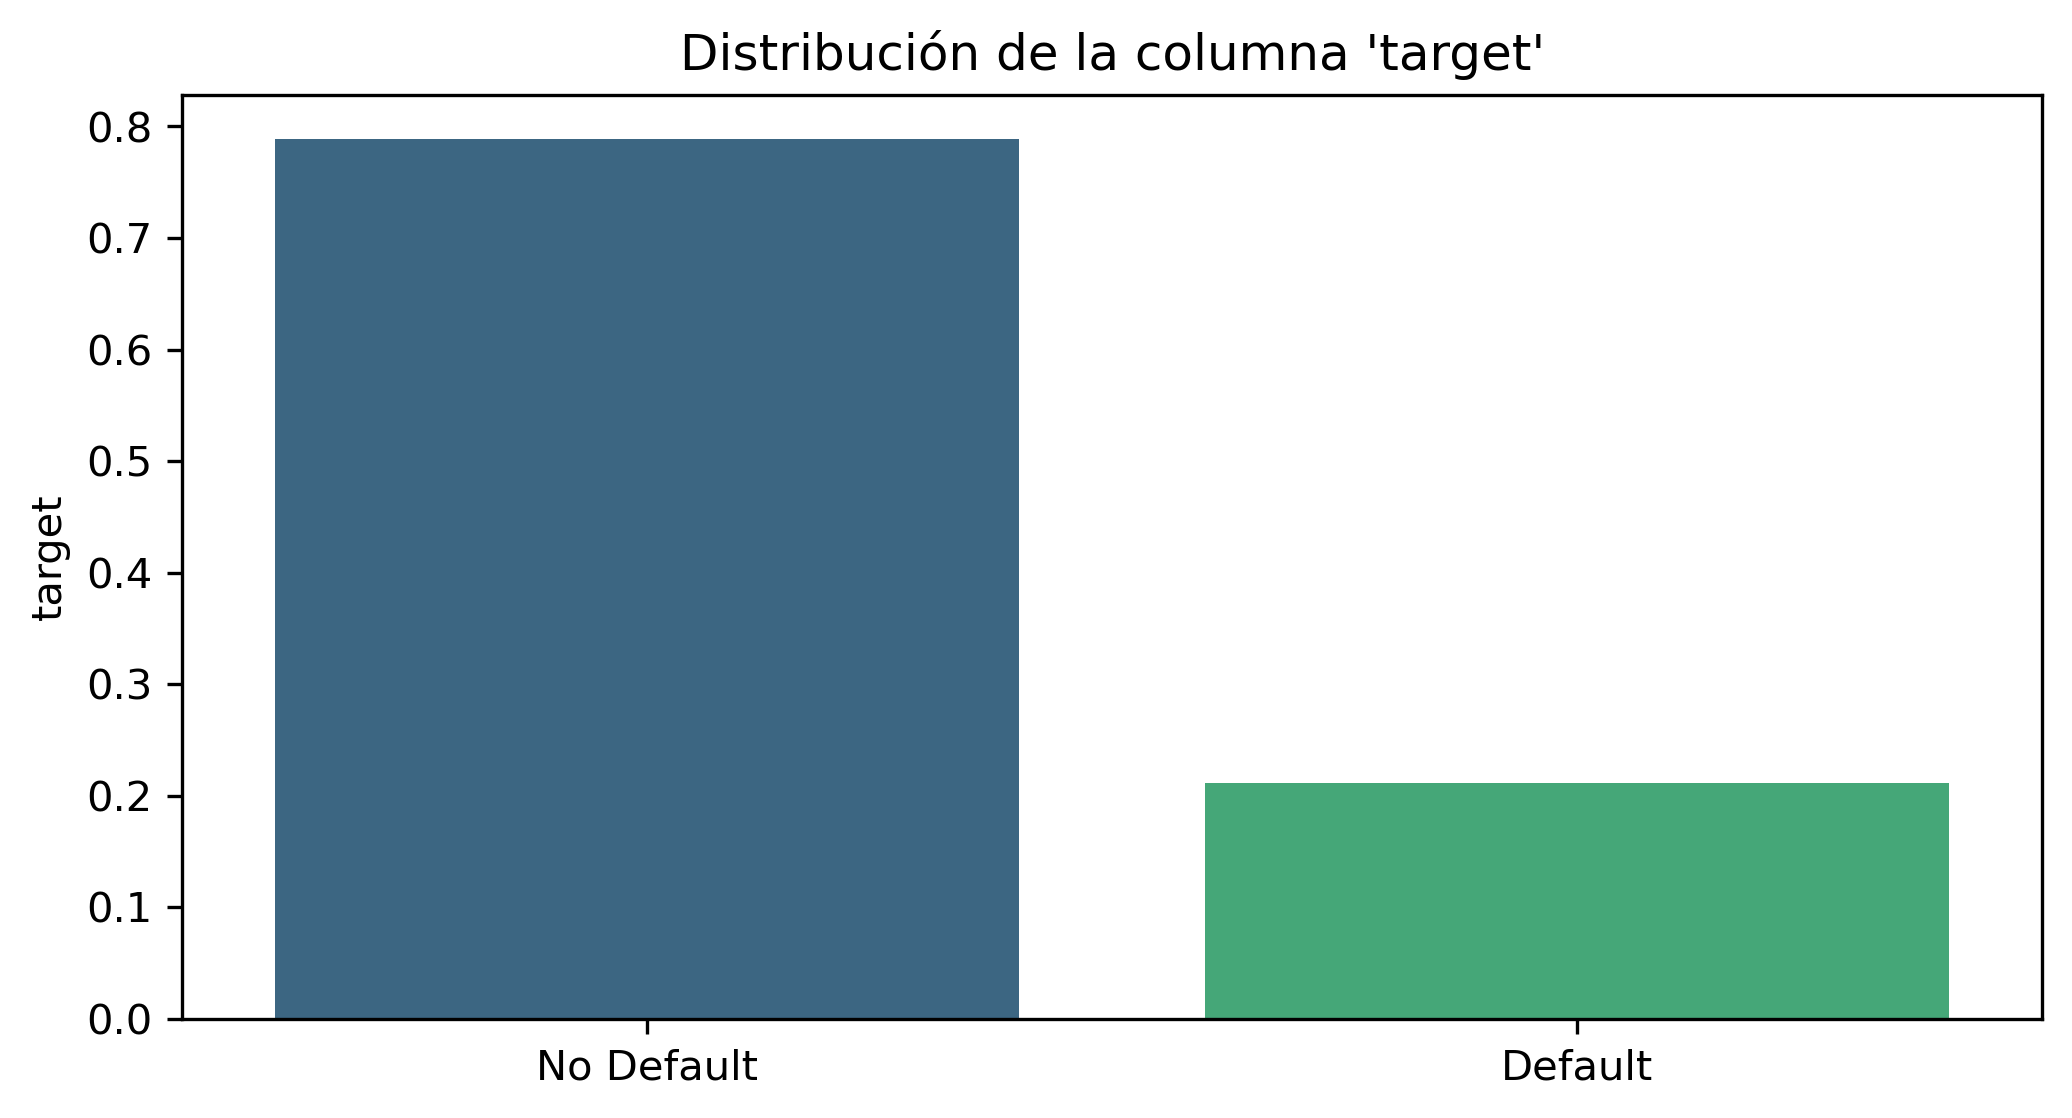

In [40]:
#observamos la proporcion de prestamos que han entrado en default

loan_data['target'].value_counts(normalize = True)

#grafico de barra
plt.figure(figsize=(8,4),dpi=300)
sns.barplot(x=['No Default','Default'], y=loan_data['target'].value_counts(normalize=True),data=loan_data, palette='viridis')
plt.title("Distribución de la columna 'target'")
plt.show()


In [41]:
loan_data.shape

(1373886, 85)

# Tarea 3

# Calculo de medidas de tendencia central y dispersión

In [42]:
#Creación de funciones para calcular medidas de tendencia central y dispersión

def media(numeros):
    return sum(numeros) / len(numeros)

def varianza_m(numeros):
    media = sum(numeros) / len(numeros)
    return sum( (x - media) ** 2 for x in numeros) / (len(numeros)-1)



#probamos las funciones creadas

print(
    f"La media de la columna 'loan_amnt' es: {media(loan_data['loan_amnt'])}" 
    f"\nLa varianza de la columna 'loan_amnt' es: {varianza_m(loan_data['loan_amnt'])} "
    )	


La media de la columna 'loan_amnt' es: 14458.31078779462
La varianza de la columna 'loan_amnt' es: 76444476.27325907 


In [43]:
#Calculamos la media y varianza de todas las columnas numéricas

# Lista para almacenar los resultados
resultados = []


for col in loan_data.select_dtypes('number').columns:
    # Omitir los valores NaN en la columna actual
    columna_sin_na = loan_data[col].dropna()
    
    media_col = media(columna_sin_na)
    varianza_col = varianza_m(columna_sin_na)
    
    resultados.append([col, media_col, varianza_col])


# Convertir la lista de resultados en un DataFrame
df_resultados = pd.DataFrame(resultados, columns=['columna', 'media', 'varianza'])

# Mostrar el DataFrame
print(df_resultados)

                        columna        media          varianza
0                     loan_amnt 14458.310788   76444476.273259
1                   funded_amnt 14449.665820   76378812.757633
2               funded_amnt_inv 14422.504768   76483362.943883
3                          term    41.864067        106.350408
4                      int_rate    13.285944         22.919677
..                          ...          ...               ...
76   total_il_high_credit_limit 42273.341748 1779619252.582248
77                hardship_flag     0.000591          0.000591
78          disbursement_method     0.005526          0.005495
79  days_since_earliest_cr_line  5933.159868    7534973.593693
80                       target     0.211128          0.166553

[81 rows x 3 columns]


# Prueba de normalidad

In [44]:
#Comprobación si las variables numéricas siguen una distribución normal (paramétricas)

#usamos un α = 0.05 para determinar si la variable sigue una distribución normal

# Lista para almacenar los resultados
resultados = []


for col in loan_data.select_dtypes('number').columns:
    # Omitir los valores NaN en la columna actual
    columna_sin_na = loan_data[col].dropna()
    pvalor=shapiro(columna_sin_na)[1]
    if shapiro(columna_sin_na)[1] < 0.05:
        texto = 'No sigue una distribución normal'
    else:
        texto = 'Sigue una distribución normal'
    
    resultados.append([col, pvalor,texto])
    
    
resultados= pd.DataFrame(resultados, columns=['columna', 'pvalor','Distribución'])

print(resultados)



#Se concluye que ninguna variable numérica sigue una distribución normal



                        columna   pvalor                      Distribución
0                     loan_amnt 0.000000  No sigue una distribución normal
1                   funded_amnt 0.000000  No sigue una distribución normal
2               funded_amnt_inv 0.000000  No sigue una distribución normal
3                          term 0.000000  No sigue una distribución normal
4                      int_rate 0.000000  No sigue una distribución normal
..                          ...      ...                               ...
76   total_il_high_credit_limit 0.000000  No sigue una distribución normal
77                hardship_flag 0.000000  No sigue una distribución normal
78          disbursement_method 0.000000  No sigue una distribución normal
79  days_since_earliest_cr_line 0.000000  No sigue una distribución normal
80                       target 0.000000  No sigue una distribución normal

[81 rows x 3 columns]


# Gráficos de distribución de las variables numéricas

In [45]:
for col in loan_data.select_dtypes('number').columns:
    if loan_data[col].nunique() >= 10:  # Solo ejecuta el código si la columna tiene 10 o más valores únicos
        Q1 = loan_data[col].quantile(0.25)
        Q3 = loan_data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_threshold = Q1 - 5 * IQR
        upper_threshold = Q3 + 5 * IQR

        loan_data = loan_data[(loan_data[col] >= lower_threshold) & (loan_data[col] <= upper_threshold)]


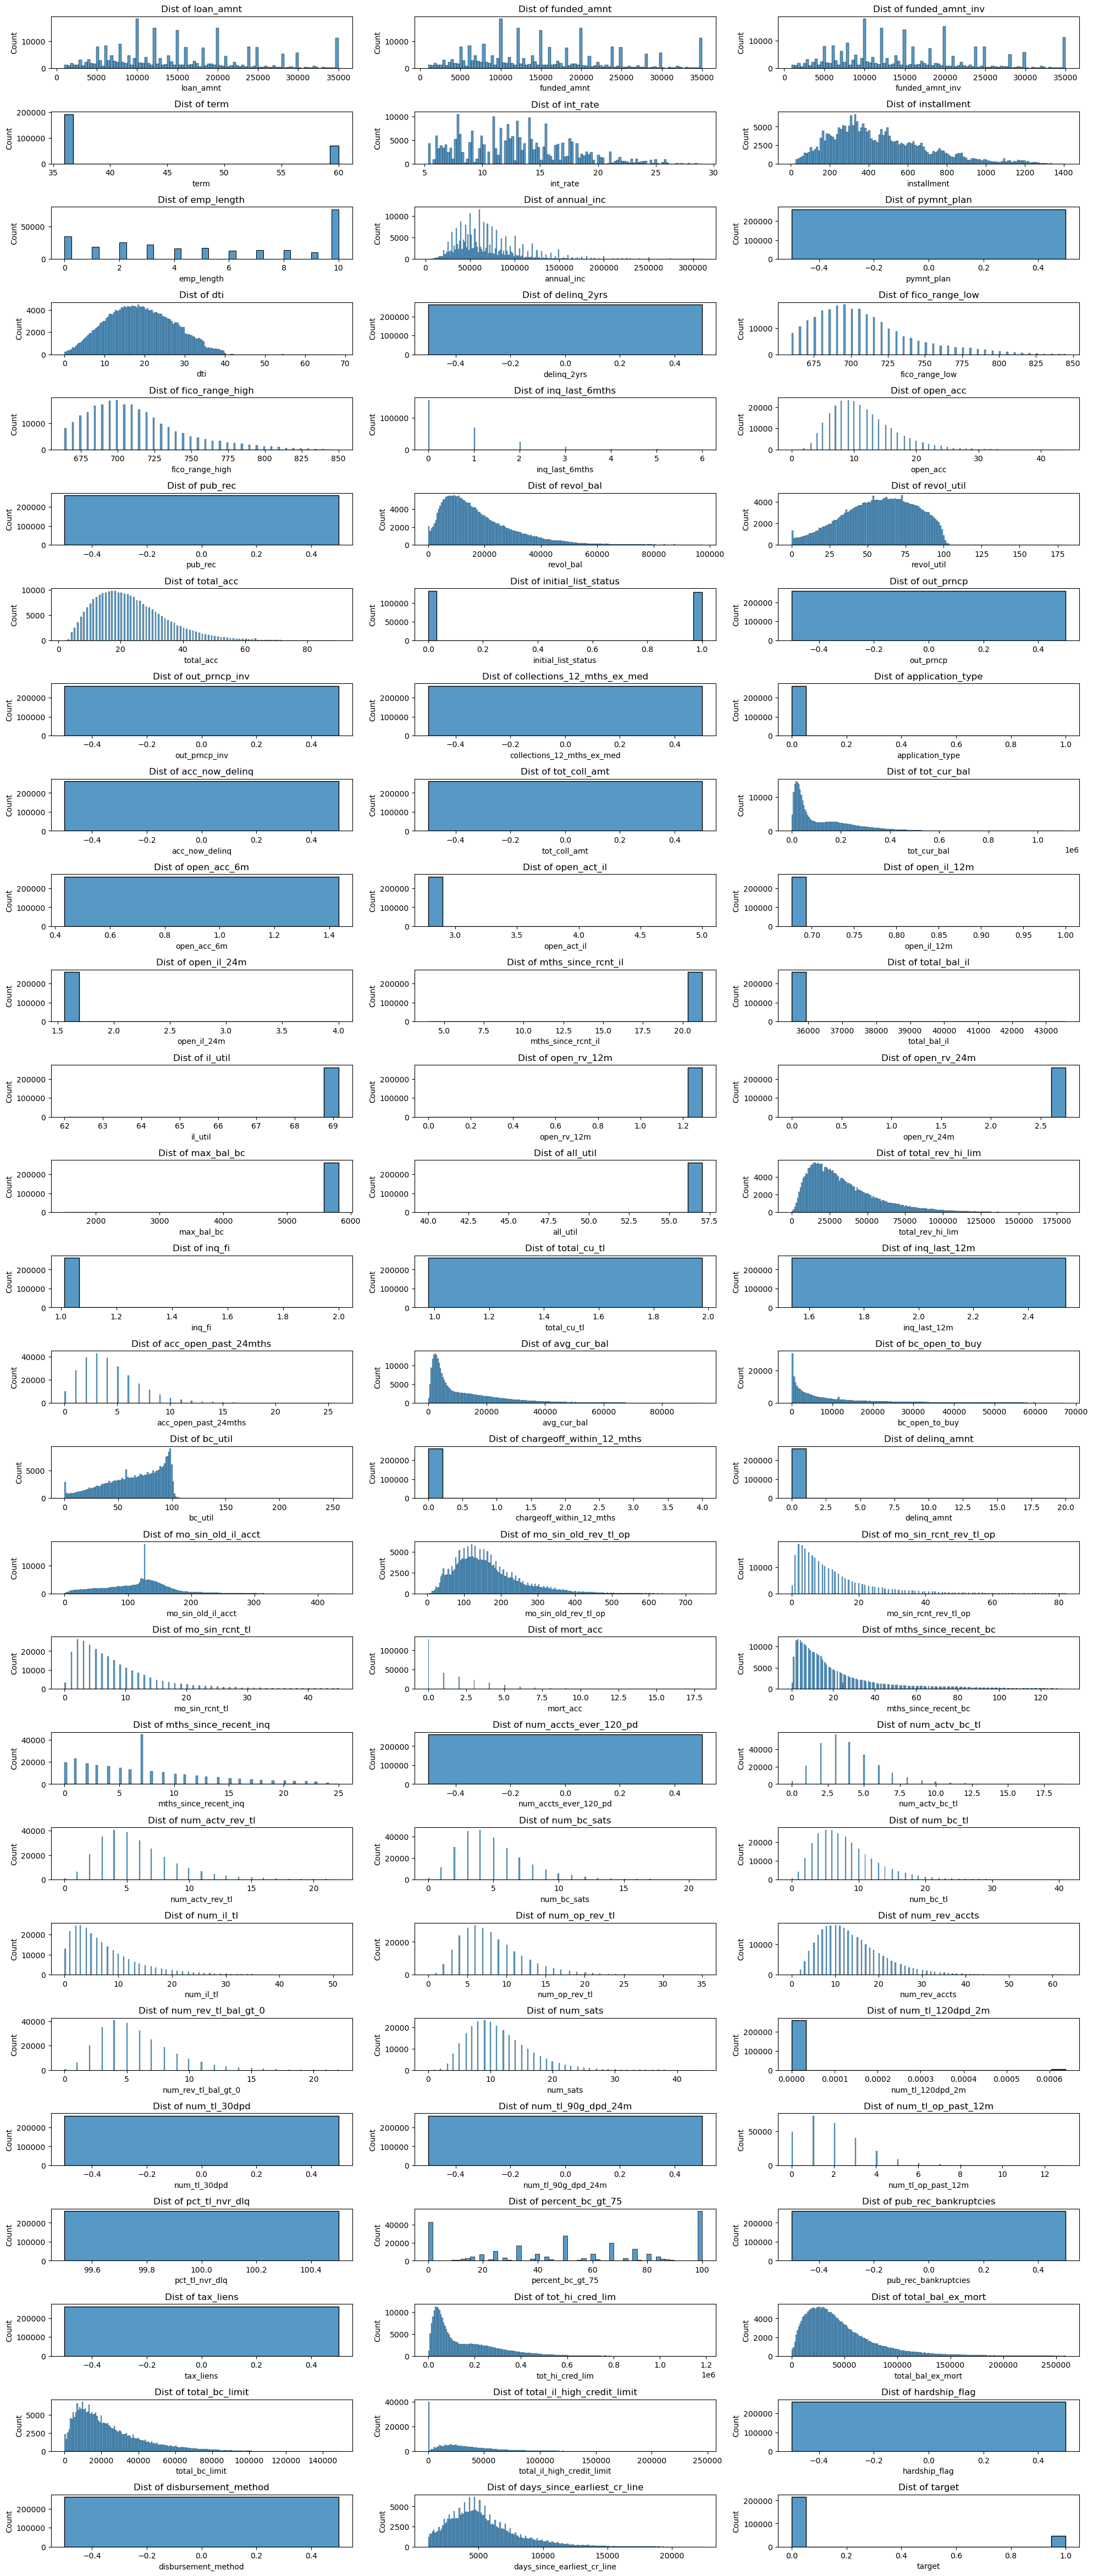

In [46]:
#Distribución de las variables

num_cols = loan_data.select_dtypes('number').columns

plt.figure(figsize=(20, 50))
for i in range(len(num_cols)):
    plt.subplot(29, 3, i + 1)
    sns.histplot(data=loan_data, x=num_cols[i])
    plt.title(f'Dist of {num_cols[i]}')


plt.tight_layout();

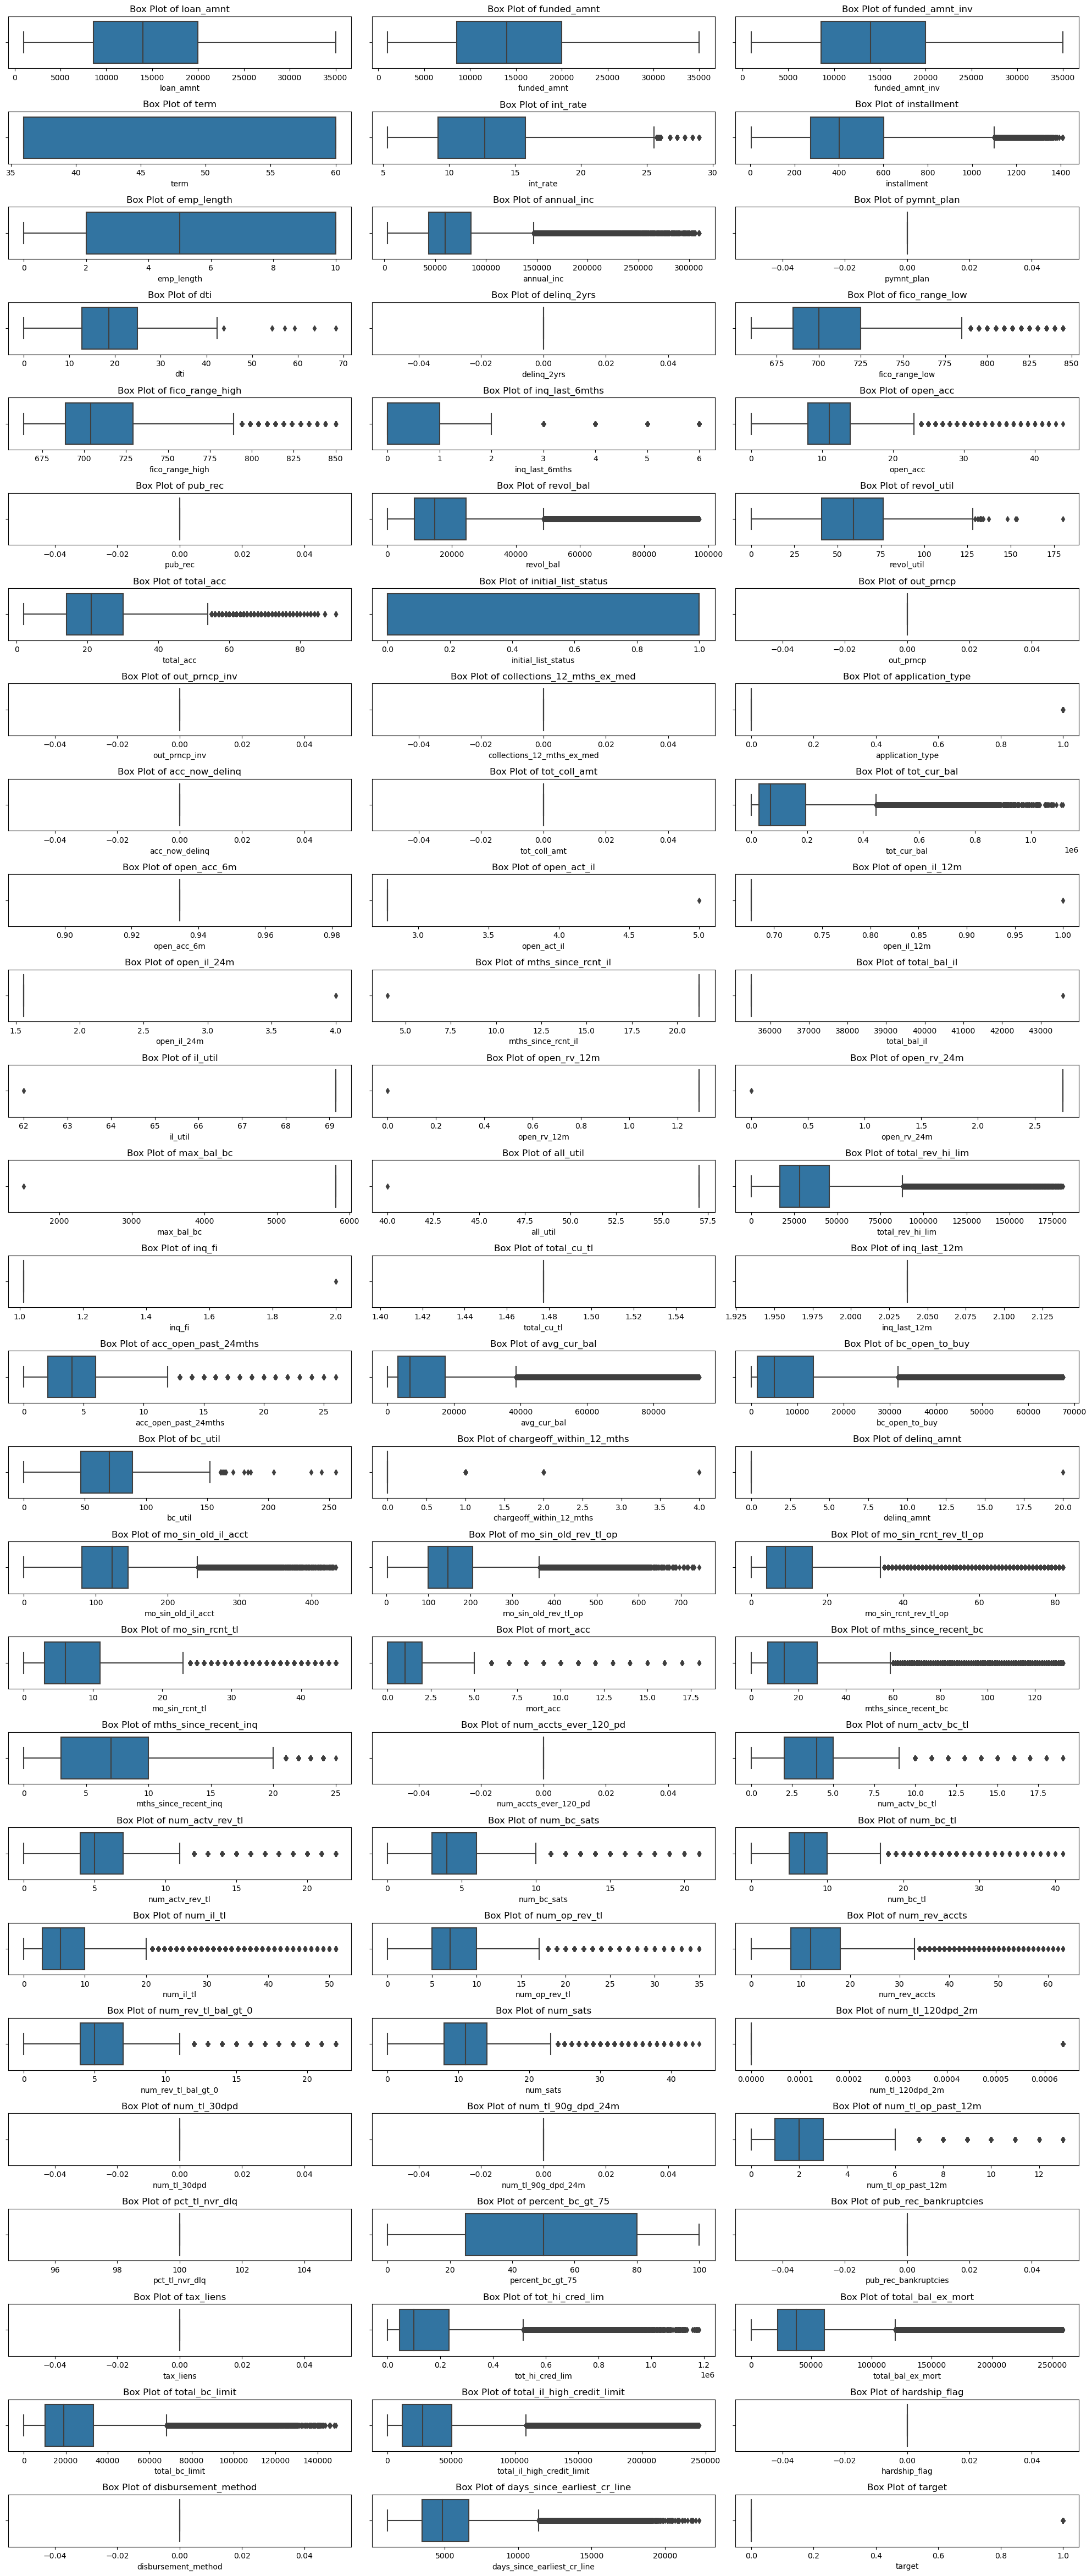

In [47]:
#Boxplot de las variables
num_cols = loan_data.select_dtypes('number').columns

plt.figure(figsize=(20, 50))
for i in range(len(num_cols)):
    plt.subplot(29, 3, i + 1)
    sns.boxplot(data=loan_data, x=num_cols[i])
    plt.title(f'Box Plot of {num_cols[i]}')


plt.tight_layout();

In [48]:
#Eliminamos las columas altamente sesgadas

threshold = 0.999  # 99.5%

cols_to_drop = []  # Lista para almacenar las columnas a eliminar

for col in loan_data.columns:
    most_common_value_pct = loan_data[col].value_counts(normalize=True).iloc[0]  # Proporción del valor más común
    if most_common_value_pct > threshold:
        cols_to_drop.append(col)

loan_data.drop(columns=cols_to_drop, inplace=True)


# Matriz de correlaciones variables numéricas

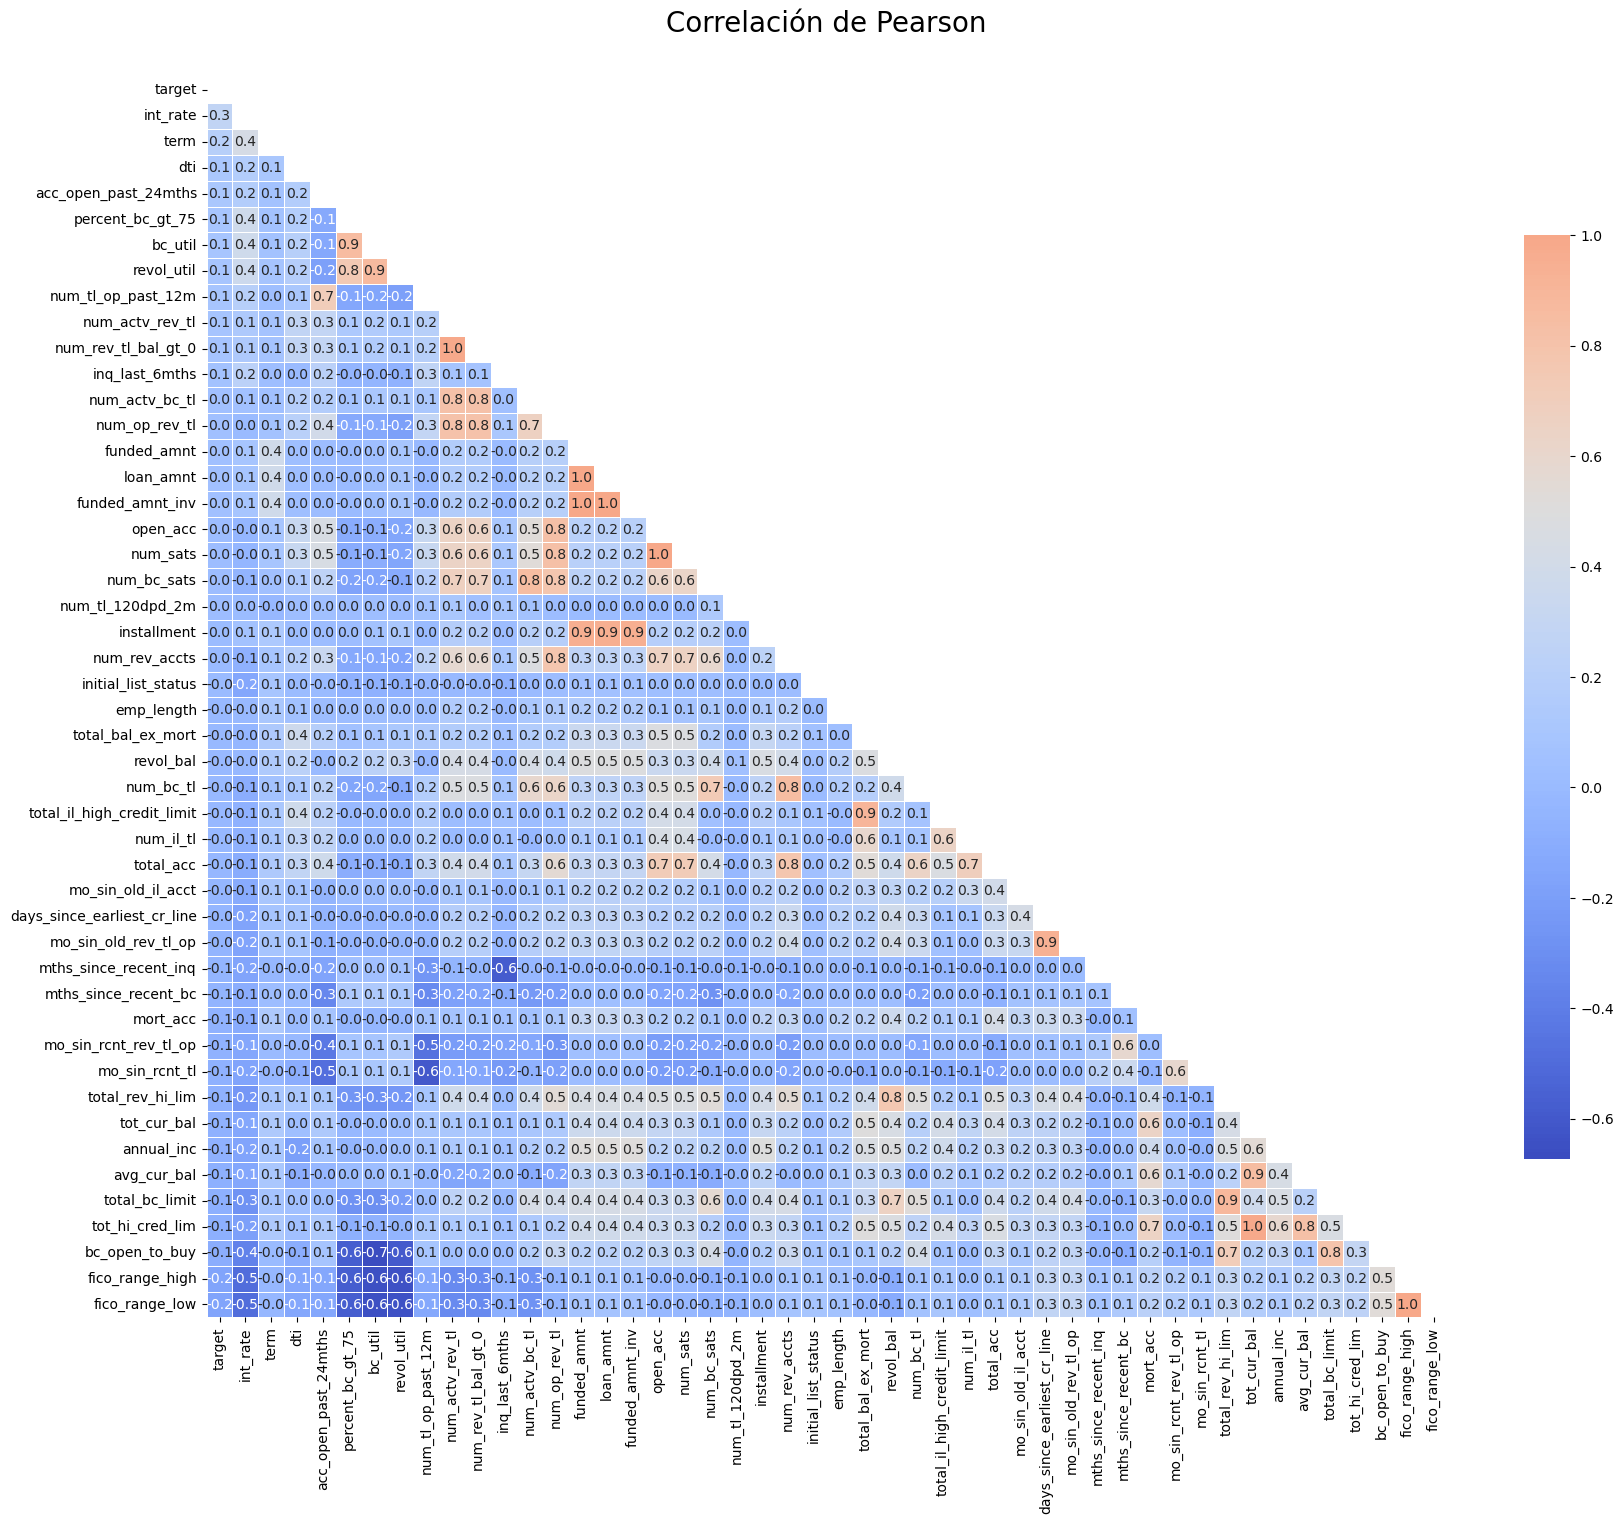

"\nObservamos que las variables 'funded_amnt' , 'loan_amnt' y 'found_amnt_inv' tienen  el mismo comportamiento.\nal igual que las variables out_prncp y out_prncp_inv\nPor lo que vamos a realizar una prueba de hipótesis para determinar si son iguales\n"

In [49]:
# calcula la correlación de Pearson entre las variables numéricas sin NA
corrmat = loan_data.select_dtypes('number').dropna().corr(method='pearson')

# Ordena las columnas basado en la correlación con "loan_amount"
sorted_cols = corrmat['target'].sort_values(ascending=False).index  # Esto devolverá el índice de las columnas ordenadas
corrmat = corrmat[sorted_cols].T[sorted_cols].T  # Reorganiza las filas y columnas según el orden

# Función para solo dejar una mitad de la matriz, ya que es simétrica
mask = np.triu(np.ones_like(corrmat, dtype=np.bool_))

# Inicializa la figura
f, ax = plt.subplots(figsize=(20, 20))

# Define la paleta de color
cmap = sns.color_palette("RdBu_r", as_cmap=True)

# Crea el mapa de calor con la matriz de correlación
sns.heatmap(corrmat, cmap='coolwarm', mask=mask, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True, fmt=".1f",
            annot_kws={"size": 10})

# Ajustamos el título
ax.set_title("Correlación de Pearson", fontsize=20, y=1.03)

# Show the plot
plt.show()

'''
Observamos que las variables 'funded_amnt' , 'loan_amnt' y 'found_amnt_inv' tienen  el mismo comportamiento.
al igual que las variables out_prncp y out_prncp_inv
Por lo que vamos a realizar una prueba de hipótesis para determinar si son iguales
'''

# Prueba de hipótesis

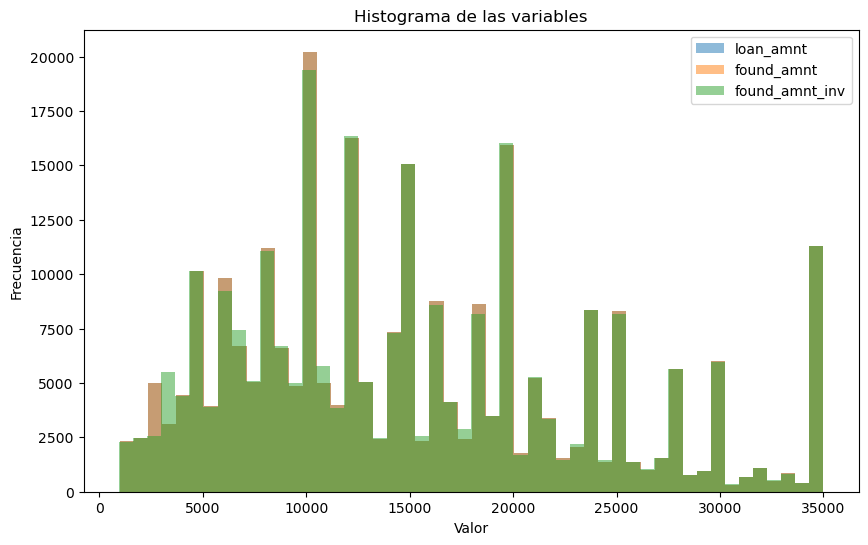

Estadístico: 34108802348.0
Valor p: 0.9999965575569786
Estadístico: 34185800359.0
Valor p: 0.15749317857339673


In [50]:
# Realizar la prueba  Mann-Whitney U, para determinar si las distribuciones de las variables son iguales

#H0 (Hipótesis nula): Las distribuciones de ambas muestras son iguales, por lo que no hay diferencia entre las dos poblaciones de las que se extrajeron las muestras.

#H1 (Hipótesis alternativa): Las distribuciones de las muestras son diferentes.

#usamos α = 0.05 para determinar si las distribuciones son iguales
statistic1, p_value1 = mannwhitneyu(loan_data['loan_amnt'], loan_data['funded_amnt'])
statistic2, p_value2 = mannwhitneyu(loan_data['loan_amnt'], loan_data['funded_amnt_inv'])


# Visualizar las distribuciones
plt.figure(figsize=(10, 6))
plt.hist(loan_data['loan_amnt'], bins=50, alpha=0.5, label='loan_amnt')
plt.hist(loan_data['funded_amnt'], bins=50, alpha=0.5, label='found_amnt')
plt.hist(loan_data['funded_amnt_inv'], bins=50, alpha=0.5, label='found_amnt_inv')
plt.legend()
plt.title('Histograma de las variables')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

print(f"Estadístico: {statistic1}")
print(f"Valor p: {p_value1}")

print(f"Estadístico: {statistic2}")
print(f"Valor p: {p_value2}")



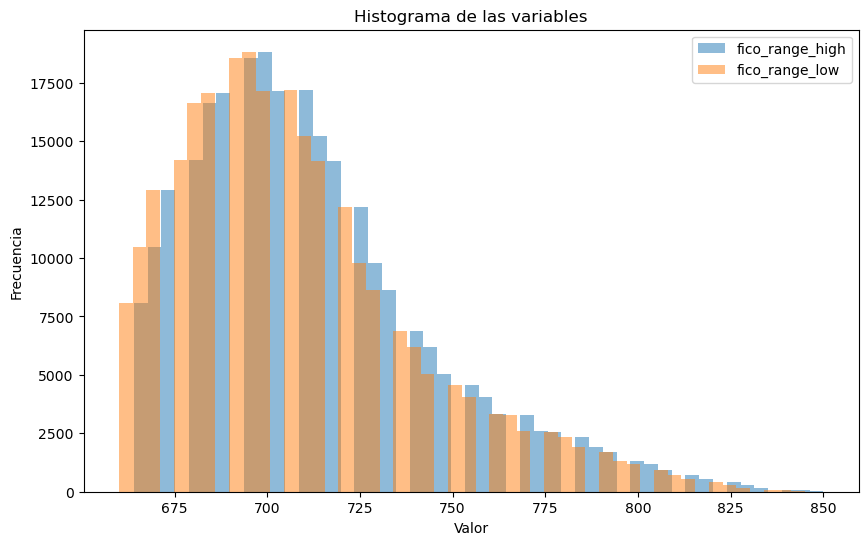

Estadístico: 35783128600.0
Valor p: 1.8875695670700204e-207


In [51]:
# Realizar la prueba  Mann-Whitney U, para determinar si las distribuciones de las variables son iguales

#H0 (Hipótesis nula): Las distribuciones de ambas muestras son iguales, por lo que no hay diferencia entre las dos poblaciones de las que se extrajeron las muestras.

#H1 (Hipótesis alternativa): Las distribuciones de las muestras son diferentes.

#usamos α = 0.05 para determinar si las distribuciones son iguales
statistic3, p_value3 = mannwhitneyu(loan_data['fico_range_high'], loan_data['fico_range_low'])




# Visualizar las distribuciones
plt.figure(figsize=(10, 6))
plt.hist(loan_data['fico_range_high'], bins=50, alpha=0.5, label='fico_range_high')
plt.hist(loan_data['fico_range_low'], bins=50, alpha=0.5, label='fico_range_low')
plt.legend()
plt.title('Histograma de las variables')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

print(f"Estadístico: {statistic3}")
print(f"Valor p: {p_value3}")



In [52]:
'''
Se concluye que las distribuciones de las variables 'founded_amnt' y 'funded_amnt_inv' son iguales a la de loan_ammt, por lo que eliminamos la variable 'funded_amnt' y 'funded_amnt_inv'

'''

loan_data.drop(columns = ['funded_amnt', 'funded_amnt_inv', ], inplace = True)

# Matriz de correlaciones variables categóricas

In [53]:

'''
La V de Cramer es una medida de asociación entre dos variables categóricas.
Proporciona un valor entre 0 y 1 que indica la fuerza de la relación entre las variables.
Es una extensión del coeficiente de contingencia y se basa en la estadística chi-cuadrado


vamos a definir la siguiente tabla de interpretación de la V de Cramer

[0,0.1) : No hay correlación
[0.1,0.3) : Correlación débil
[0.3,0.5) : Correlación moderada
[0.5,1] : Correlación fuerte
'''
#Función para calcular el coeficiente de correlación de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

#Función para crear la matriz de correlación de Cramer
def categorical_corr_matrix(df):
    # Seleccionar solo columnas categóricas
    cat_cols = df.select_dtypes(exclude=[np.number]).columns
    n = len(cat_cols)
    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cat_cols, index=cat_cols)
    for col1 in cat_cols:
        for col2 in cat_cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
            else:
                corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return corr_matrix

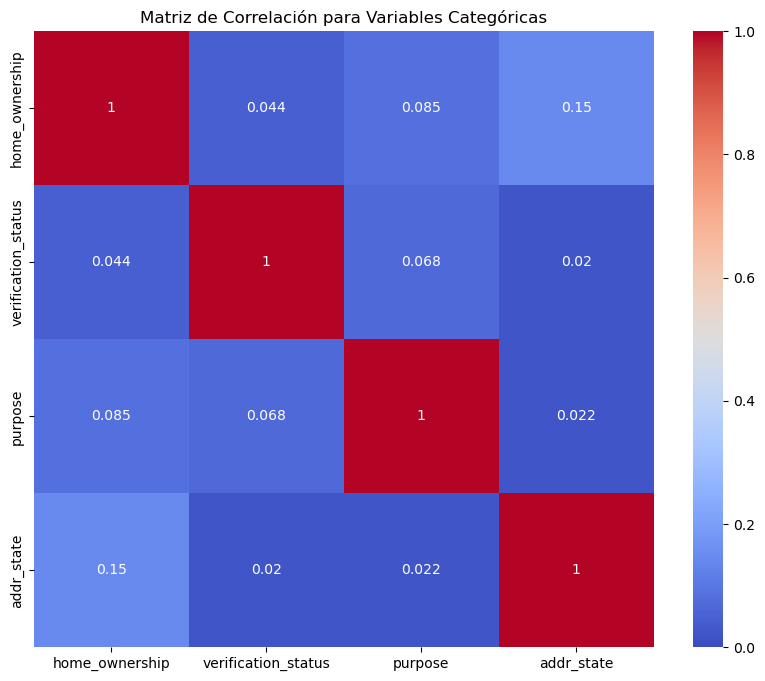

In [54]:
#hacemos el calculo y lo mostramos

corr_matrix = categorical_corr_matrix(loan_data)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Matriz de Correlación para Variables Categóricas')
plt.show()

In [55]:
# vamos a separar los datos en prueba y entrenamiento


'''
Explicación de cada conjunto 

75% de los datos serán usados para el entrenamiento y 25% para la prueba

1. X_train: 
   - Contiene las características de los datos que se utilizarán para entrenar el modelo.
   - No incluye la variable objetivo, solo las características.

2. y_train: 
   - Contiene la variable objetivo correspondientes a X_train.
   - Se utiliza para entrenar el modelo junto con X_train, permitiendo que el modelo aprenda la relación entre las características y la variable objetivo.

3. X_test: 
   - Contiene las características de los datos que se utilizarán para evaluar el rendimiento del modelo una vez entrenado.
   - Al igual que X_train, solo contiene las características y no la variable objetivo.

4. y_test: 
   - Contiene la variable objetivo correspondientes a X_test.
   - Se utiliza para evaluar la precisión del modelo comparando las predicciones del modelo (basadas en X_test) con las verdaderas etiquetas en y_test.

'''


# Definir las características (X) y la variable objetivo (y)
X = loan_data.drop('target', axis=1)
y = loan_data['target']

# Separar los datos en conjuntos de entrenamiento y prueba

#stratify asegura que la distribución de la variable objetivo sea la misma en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)



#Creamos una copia

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()


# Tarea 3 
## Selección de características


## Métodos univariados

Los métodos univariado de selección de características evalúa y selecciona características (o variables) basándose en pruebas estadísticas univariadas que consideran cada característica de forma individual en relación con la variable objetivo. Estos métodos no tienen en cuenta las posibles interacciones entre características, sino que se centran en la relación directa entre una única característica y la variable objetivo.

### V de cramer // prueba chi cuadrado

In [56]:
# V de Cramer y prueba chi2

#para variables categóricas

#H0 (Hipótesis nula): No hay asociación entre las dos variables categóricas. Es decir, las variables son independientes entre sí.

#H1 (Hipótesis alternativa): Existe una asociación entre las dos variables categóricas. Es decir, las variables no son independientes


# definimos un diccionario para almacenar los resultados
chi2_check = {}

# iteramos sobre cada columna categórica, calculamos el p-valor de la prueba chi2 y la V de Cramer
for column in X_train.select_dtypes(exclude=[np.number]).columns:
    crosstab = pd.crosstab(y_train, X_train[column])
    chi, p, dof, ex = chi2_contingency(crosstab)
    chi2_check.setdefault('Columna_Categorica',[]).append(column)
    chi2_check.setdefault('p-valor',[]).append(round(p, 10))
    chi2_check.setdefault('V de Cramer',[]).append(cramers_v(y_train, X_train[column]))
  

# convertimos el diccionario en un DataFrame
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['V de Cramer'], ascending = False, ignore_index = True, inplace = True)
chi2_result

#Bajo este enfoque seleccionamos aquellas características con una mayor correlación con la variable objetivo, es decir mayor de v de Cramer o con el menor p-valor



Columna_Categorica  p-valor  V de Cramer
0  verification_status 0.000000     0.087731
1       home_ownership 0.000000     0.060263
2              purpose 0.000000     0.050539
3           addr_state 0.000000     0.048983

### ANOVA // prueba F

In [57]:
#Para variables numéricas vamos a usar la prueba F, para ver si una diferencia entre las medias entre la variable objetivo y las variables numéricas

#H0:(Hipótesis nula): Las medias de la característica numérica son iguales para todas las categorías de la variable objetivo target.

#H1:(Hipótesis alternativa): Al menos una de las medias de la característica numérica es diferente entre las categorías de la variable objetivo target.


# Calculamos el valor F y el p-valor de cada variable numérica
x=X_train.select_dtypes('number')
y=y_train
F_statistic, p_valor = f_classif(x,y)


# convertimos en DF los resultados
Tabla_variables = pd.DataFrame(data = {'Columna_numerica': x.columns.values, 'F-Score': F_statistic, 'p-valor': p_valor.round(decimals=10)})
Tabla_variables.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
Tabla_variables


#La prueba F nos indica que las variables con diferencia significativas entre las medias de la variable separada por la variable objetivo, por lo que las características
#que nos interesarían serian aquellas con u p valor menor al 0.05 o con un F-score mas alto


Columna_numerica      F-Score  p-valor
0                      int_rate 16791.418843 0.000000
1                          term  8831.873021 0.000000
2                fico_range_low  5337.368747 0.000000
3               fico_range_high  5337.229606 0.000000
4                           dti  2628.329269 0.000000
5          acc_open_past_24mths  2400.081645 0.000000
6                bc_open_to_buy  2307.211093 0.000000
7                       bc_util  2029.377796 0.000000
8              percent_bc_gt_75  2023.850285 0.000000
9                    revol_util  1697.837047 0.000000
10           num_tl_op_past_12m  1669.300647 0.000000
11               total_bc_limit  1500.826535 0.000000
12              tot_hi_cred_lim  1461.928671 0.000000
13                  avg_cur_bal  1423.703881 0.000000
14          num_rev_tl_bal_gt_0  1422.057357 0.000000
15              num_actv_rev_tl  1421.688458 0.000000
16                   annual_inc  1284.694264 0.000000
17                  tot_cur_bal  1102.784079 0.000000
18             total_rev_hi_lim   982.230105 0.000000
19               mo_sin_rcnt_tl   924.901255 0.000000
20               inq_last_6mths   823.688446 0.000000
21        mo_sin_rcnt_rev_tl_op   770.430722 0.000000
22                     mort_acc   756.405106 0.000000
23         mths_since_recent_bc   697.428771 0.000000
24        mths_since_recent_inq   548.834571 0.000000
25               num_actv_bc_tl   469.878891 0.000000
26         mo_sin_old_rev_tl_op   452.001162 0.000000
27                num_op_rev_tl   347.416948 0.000000
28                    loan_amnt   317.079522 0.000000
29  days_since_earliest_cr_line   257.419072 0.000000
30           mo_sin_old_il_acct   217.509819 0.000000
31                     open_acc   103.820424 0.000000
32                     num_sats   103.251852 0.000000
33                    total_acc    75.608056 0.000000
34             num_tl_120dpd_2m    65.384769 0.000000
35                  num_bc_sats    60.693398 0.000000
36   total_il_high_credit_limit    55.926391 0.000000
37                    num_il_tl    48.409528 0.000000
38                    num_bc_tl    34.231366 0.000000
39                  installment    26.659358 0.000000
40                    revol_bal    20.562123 0.000006
41            total_bal_ex_mort    15.474096 0.000084
42                   emp_length     8.179117 0.004238
43          initial_list_status     3.661231 0.055694
44                num_rev_accts     0.392862 0.530800

### Information Value

El "Information Value" (IV) entra en la categoría de métodos univariados de selección de características. Es una técnica ampliamente utilizada en la modelación de riesgos de crédito y  para evaluar la importancia predictiva de una característica  (Segmentada en buckets o categorías) en relación con una variable objetivo binaria (por ejemplo, bueno/malo, 1/0, sí/no).


### Weight of Evidence (WoE)

La fórmula para calcular el Weight of Evidence (WoE) para una categoría específica es:

$$ WoE = \ln\left(\frac{\text{Proporción de Eventos Positivos en la Categoría}}{\text{Proporción de Eventos Negativos en la Categoría}}\right) $$

### Information Value (IV)

La fórmula para calcular el Information Value (IV) para una característica específica es:



$$ IV = \sum \left( \left( \text{Proporción de Eventos Positivos en la Categoría} - \text{Proporción de Eventos Negativos en la Categoría} \right) \times WoE \right) $$

Donde la suma se realiza sobre todas las categorías de la característica en cuestión.

In [58]:
# La función woe_discrete calcula el Weight of Evidence (WoE) para una variable discreta.
# Argumentos:
# - df: DataFrame que contiene la variable discreta.
# - cat_variabe_name: Nombre de la columna que contiene la variable discreta.
# - y_df: DataFrame que contiene la variable objetivo (generalmente binaria, 0 o 1).

def woe_discrete(df, cat_variabe_name, y_df):
    # Concatenamos la variable discreta y la variable objetivo en un solo DataFrame.
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    
    # Agrupamos por la variable discreta y calculamos el conteo y la media de la variable objetivo.
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    # Seleccionamos las columnas relevantes y renombramos.
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    
    # Calculamos la proporción de observaciones.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    
    # Calculamos el número de "bads" y "goods" basado en la variable objetivo.
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    
    # Si n_good o n_bad son 0, se les suma 0.5
    df['n_good'] = df['n_good'].apply(lambda x: x if x != 0 else x + 0.5)
    df['n_bad'] = df['n_bad'].apply(lambda x: x if x != 0 else x + 0.5)
    
    # Calculamos la proporción de "bads" y "goods".
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    
    # Calculamos el WoE.
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    
    # Ordenamos el DataFrame por WoE.
    df = df.sort_values(['WoE'])
    
    # Restablecemos el índice.
    df = df.reset_index(drop = True)
    
    # Calculamos la diferencia en proporciones y WoE para observaciones consecutivas.
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # Calculamos el Information Value (IV).
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV_sum'] = df['IV'].sum()
    
    # Devolvemos el DataFrame resultante.
    return df


In [59]:
# Definimos una función para calcular el Weight of Evidence (WoE) para variables continuas.
# Esta función es similar a la que definimos anteriormente para variables discretas.
# La principal diferencia es que no ordenamos el DataFrame por WoE, ya que las variables continuas ya están ordenadas por naturaleza.

def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    # Concatenamos la variable continua y la variable objetivo en un solo DataFrame.
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    
    # Agrupamos por la variable continua y calculamos el conteo y la media de la variable objetivo.
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    # Seleccionamos las columnas relevantes y renombramos.
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    
    # Calculamos la proporción de observaciones.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    
    # Calculamos el número de "bads" y "goods" basado en la variable objetivo.
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    
    # Si n_good o n_bad son 0, se les suma 0.5
    df['n_good'] = df['n_good'].apply(lambda x: x if x != 0 else x + 0.5)
    df['n_bad'] = df['n_bad'].apply(lambda x: x if x != 0 else x + 0.5)
    
    # Calculamos la proporción de "bads" y "goods".
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    
    # Calculamos el WoE.
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    
    # Calculamos la diferencia en proporciones y WoE para observaciones consecutivas.
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # Calculamos el Information Value (IV).
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV_sum'] = df['IV'].sum()
    
    # Devolvemos el DataFrame resultante.
    return df



In [60]:

sns.set()

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0, ax=None):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    
    if ax is None:  # Si no se proporciona el eje, crea un nuevo gráfico
        plt.figure(figsize=(18, 6))
        plt.plot(x, y, marker='o', linestyle='--', color='k')
        plt.xlabel(df_WoE.columns[0])
        plt.ylabel('Weight of Evidence')
        plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
        plt.xticks(rotation=rotation_of_x_axis_labels)
        plt.show()
    else:  # Si se proporciona el eje, dibuja en ese eje
        ax.plot(x, y, marker='o', linestyle='--', color='k')
        ax.set_xlabel(df_WoE.columns[0])
        ax.set_ylabel('Weight of Evidence')
        ax.set_title(str('Weight of Evidence by ' + df_WoE.columns[0]))
        ax.set_xticks(x)
        ax.set_xticklabels(x, rotation=rotation_of_x_axis_labels)




In [61]:
dfs = []
ivtable = pd.DataFrame()
ivtable = pd.DataFrame(columns = ['variable', 'IV'])
cols=X_train.columns
indice=0


#Calculamos el WoE de cada variable categórica y su IV
for col in X_train_copy.select_dtypes('object').columns:
    df_temp = woe_discrete(X_train_copy, col, y_train)
    ivtable.loc[ivtable.shape[0]] = [col, df_temp['IV_sum'].iloc[0]]
    dfs.append(df_temp)


#Calculamos el WoE de cada variable numérica con agrupación y su IV

#definimos las columnas que vamos a no agrupar

cols_sin_agg=['term','emp_length','inq_last_6mths']



cols_agg = [col for col in X_train_copy.select_dtypes(include=['number']).columns if col not in cols_sin_agg]



for col in cols_agg:
    X_train_copy[col+'_bin'] = pd.cut(X_train_copy[col], 8)  # Corrección aquí
    df_temp = woe_ordered_continuous(X_train_copy, col+'_bin', y_train)
    ivtable.loc[ivtable.shape[0]] = [col, df_temp['IV_sum'].iloc[0]]
    dfs.append(df_temp)

#calculamos el WoE de cada variable numérica sin agrupación y su IV

for col in cols_sin_agg:
    df_temp = woe_ordered_continuous(X_train_copy, col, y_train)
    ivtable.loc[ivtable.shape[0]] = [col, df_temp['IV_sum'].iloc[0]]
    dfs.append(df_temp)


In [62]:
#imprimos la tabla ordena con IV mas alto

'''
Information Value	Variable Predictiveness
Less than 0.02  	Not useful for prediction
0.02 to 0.1	        Weak predictive Power
0.1 to 0.3	        Medium predictive Power
0.3 to 0.5	        Strong predictive Power
>0.5	            Suspicious Predictive Power
'''

ivtable.sort_values(by = 'IV', ascending = False, ignore_index = True, inplace = True)
ivtable

variable       IV
0                      int_rate 0.534183
1                          term 0.246632
2               fico_range_high 0.191381
3                fico_range_low 0.191381
4                bc_open_to_buy 0.082589
5                           dti 0.078236
6              percent_bc_gt_75 0.069806
7          acc_open_past_24mths 0.067352
8                       bc_util 0.064909
9           verification_status 0.056349
10                   revol_util 0.053684
11                  avg_cur_bal 0.052312
12               total_bc_limit 0.050218
13              tot_hi_cred_lim 0.048509
14           num_tl_op_past_12m 0.048053
15                   annual_inc 0.043154
16              num_actv_rev_tl 0.042273
17          num_rev_tl_bal_gt_0 0.042088
18                  tot_cur_bal 0.039085
19             total_rev_hi_lim 0.032660
20               mo_sin_rcnt_tl 0.031610
21        mths_since_recent_inq 0.027802
22               inq_last_6mths 0.027030
23         mths_since_recent_bc 0.026330
24        mo_sin_rcnt_rev_tl_op 0.025785
25               home_ownership 0.024854
26                     mort_acc 0.022169
27                  installment 0.018217
28                   addr_state 0.018101
29                      purpose 0.017836
30                    loan_amnt 0.016738
31         mo_sin_old_rev_tl_op 0.015094
32               num_actv_bc_tl 0.014688
33                num_op_rev_tl 0.010383
34           mo_sin_old_il_acct 0.009245
35  days_since_earliest_cr_line 0.008186
36                    total_acc 0.003693
37                     num_sats 0.003494
38                     open_acc 0.003468
39                  num_bc_sats 0.003079
40                   emp_length 0.002896
41                    revol_bal 0.002867
42                    num_il_tl 0.002833
43   total_il_high_credit_limit 0.002557
44             num_tl_120dpd_2m 0.001910
45                    num_bc_tl 0.001414
46            total_bal_ex_mort 0.001200
47                num_rev_accts 0.000190
48          initial_list_status 0.000119

Bajo el criterio del Information Value (IV), las características que deberíamos conservar son las primeras 15, ya que son las que tienen un IV mayor a 0.02. Las demás características no aportan información predictiva.

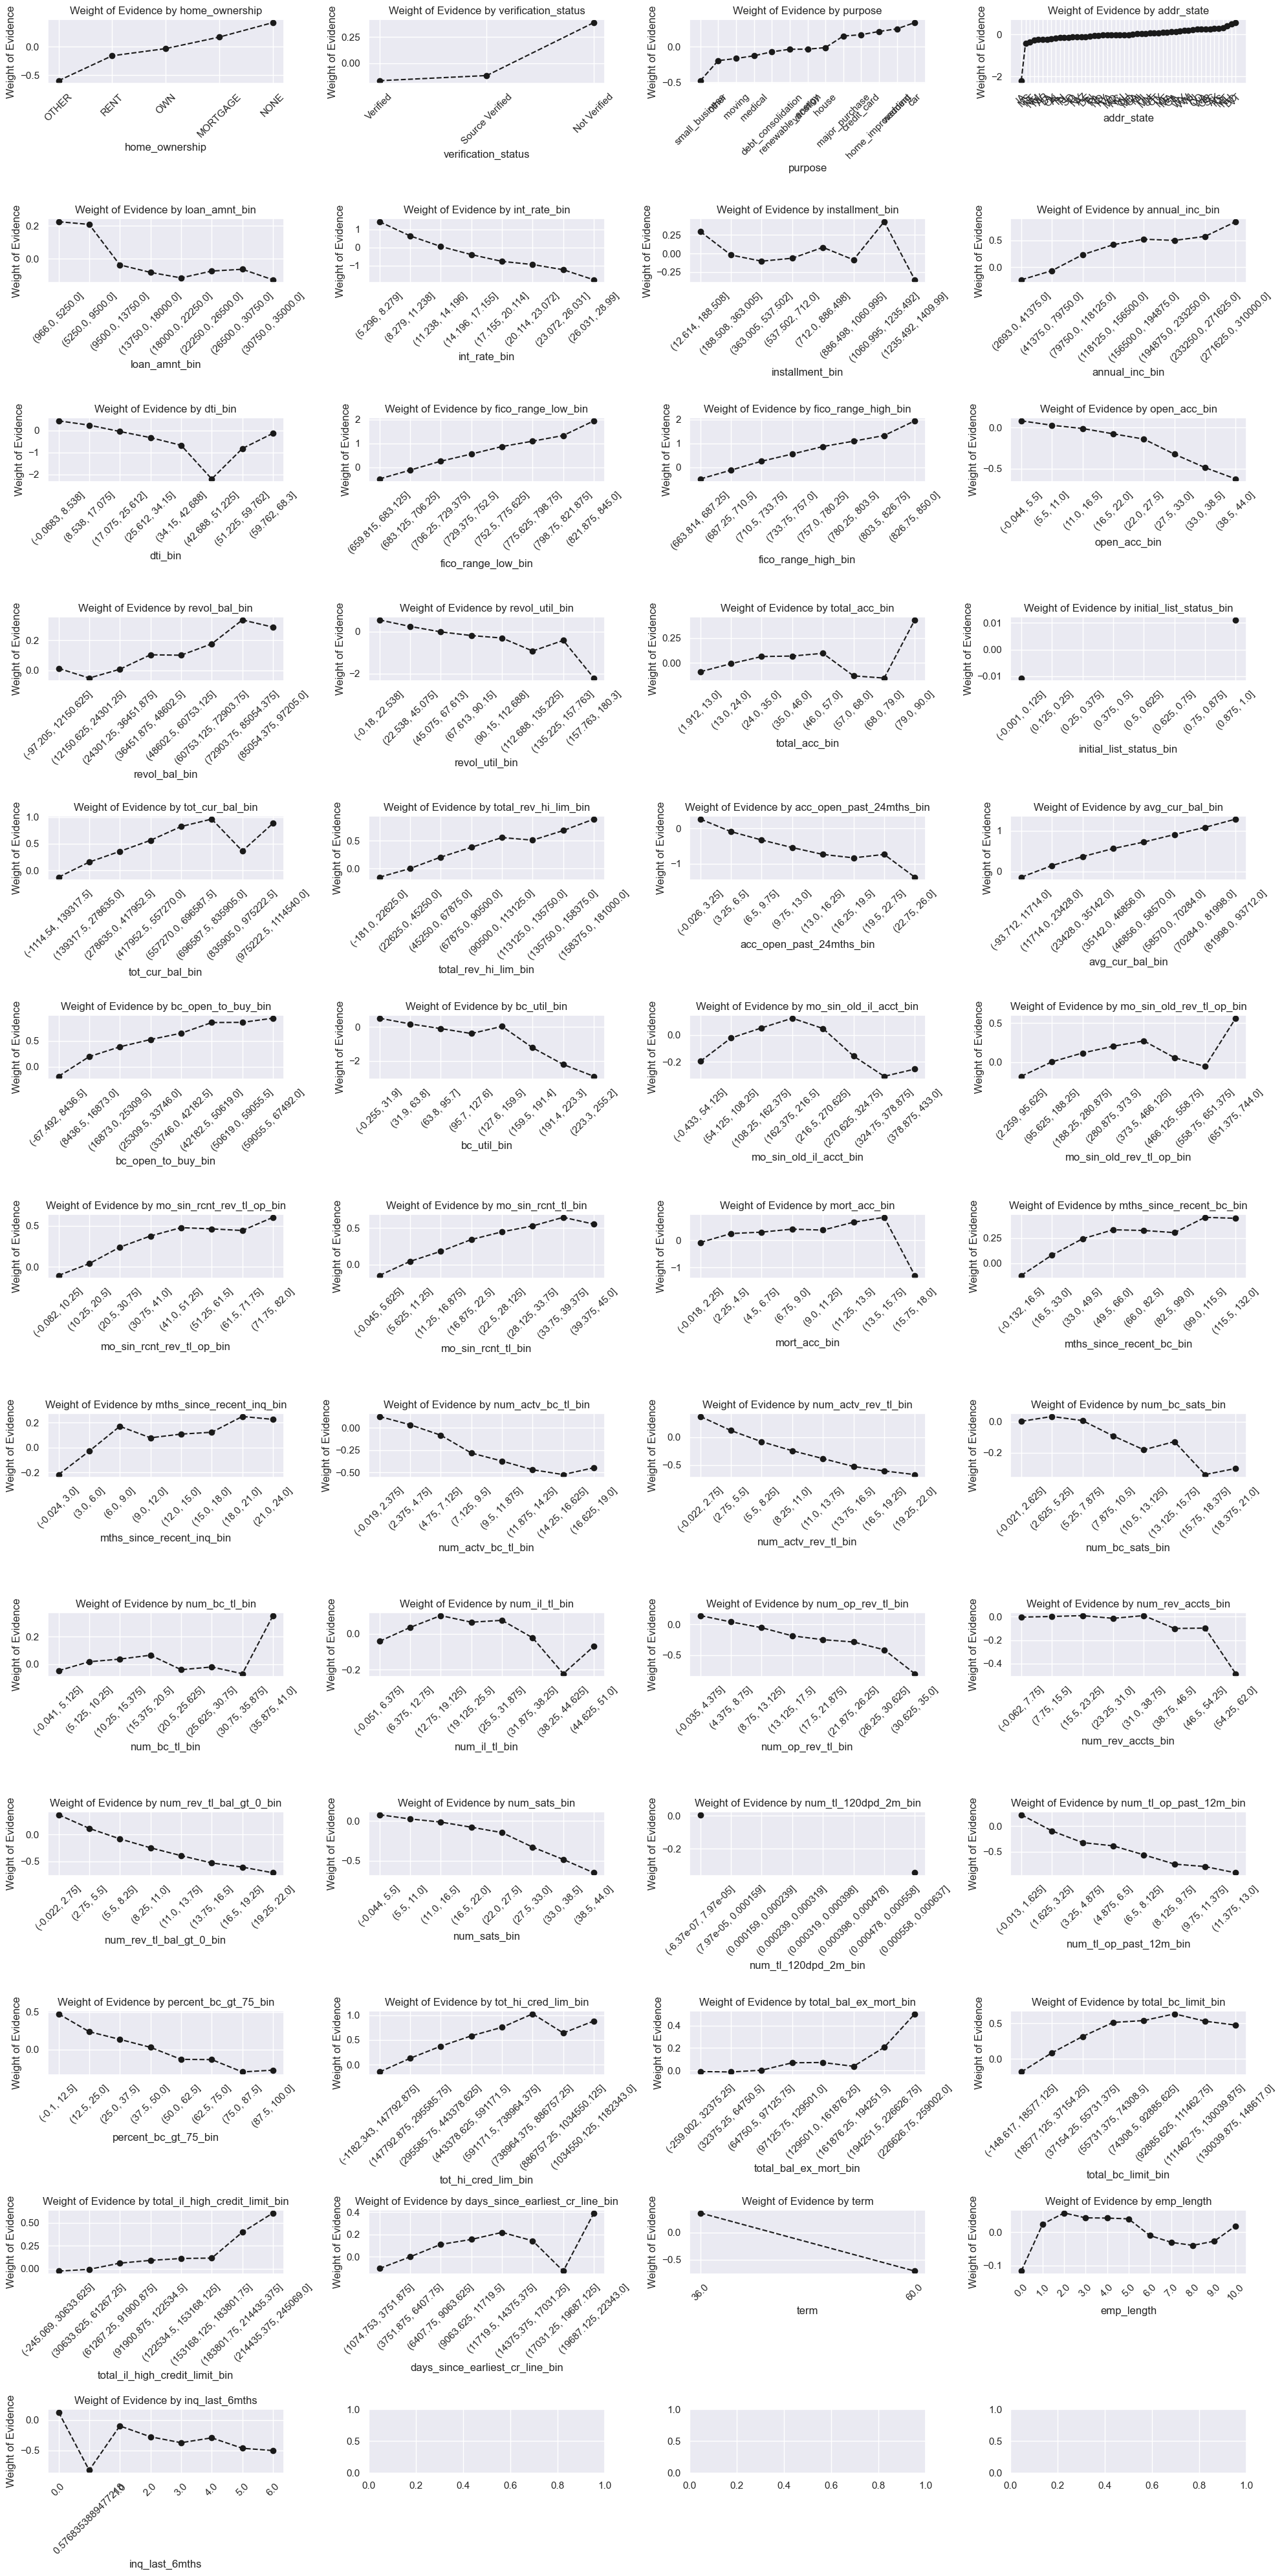

In [63]:

# Lista para almacenar los ejes de cada gráfico
axes_list = []

# Crear una disposición de 4 columnas por 9 filas
fig, axs = plt.subplots(13, 4, figsize=(20, 40))

# Calcula el número total de gráficos que necesitas hacer
total_plots = len(dfs)

for idx in range(total_plots):
    i = idx // 4  # Calcula la fila
    j = idx % 4   # Calcula la columna
    
    ax = axs[i, j]
    plot_by_woe(dfs[idx], 45, ax)
    axes_list.append(ax)
        
plt.tight_layout()
plt.show()



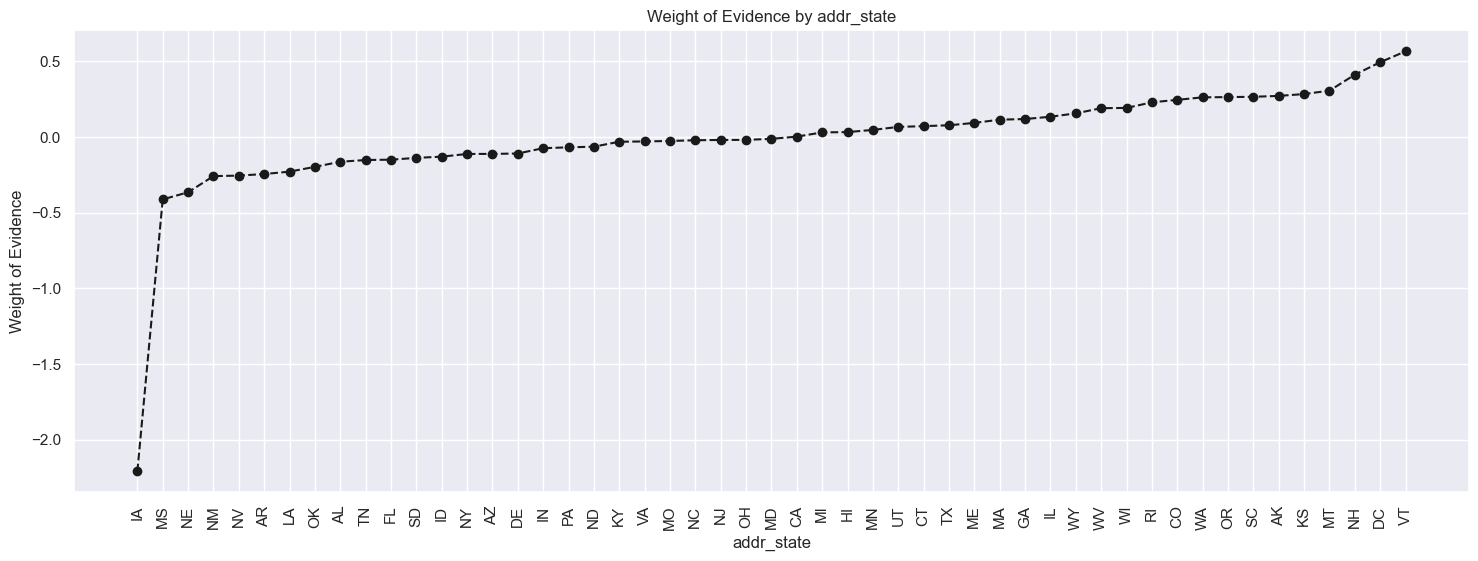

In [64]:
#Creamos una variable conjunta de Adress State 

#graficamos el woe de adress state

df_temp = woe_discrete(X_train, 'addr_state', y_train)

plot_by_woe(df_temp, 90)

In [65]:
#creamos 3 grupos de estados

# Grupo 1: WoE mayor que .3
# Grupo 2: WoE entre -3 y .3
# Grupo 3: WoE menor que -3

# realizamos el proceso creando una nueva vairable

grupo1 = list(df_temp[df_temp['WoE'] > 0.3]['addr_state'])
grupo2 = list(df_temp[(df_temp['WoE'] < 0.3) & (df_temp['WoE'] > -0.3)]['addr_state'])
grupo3 = list(df_temp[df_temp['WoE'] < -0.3]['addr_state'])

# Asginamos los datos de cada grupo con el valor 1,2,3 dentro de una misma variable
X_train['addr_state:group'] = 'na'
X_train.loc[X_train['addr_state'].isin(grupo1), 'addr_state:group'] = 1
X_train.loc[X_train['addr_state'].isin(grupo2), 'addr_state:group'] = 2
X_train.loc[X_train['addr_state'].isin(grupo3), 'addr_state:group'] = 3

#eliminamos la variable adress state
X_train.drop(columns = ['addr_state'], inplace = True)


#Replicamos en test

# Asginamos los datos de cada grupo con el valor 1,2,3 dentro de una misma variable
X_test['addr_state:group'] = 'na'
X_test.loc[X_test['addr_state'].isin(grupo1), 'addr_state:group'] = 1
X_test.loc[X_test['addr_state'].isin(grupo2), 'addr_state:group'] = 2
X_test.loc[X_test['addr_state'].isin(grupo3), 'addr_state:group'] = 3

#eliminamos la variable adress state
X_test.drop(columns = ['addr_state'], inplace = True)



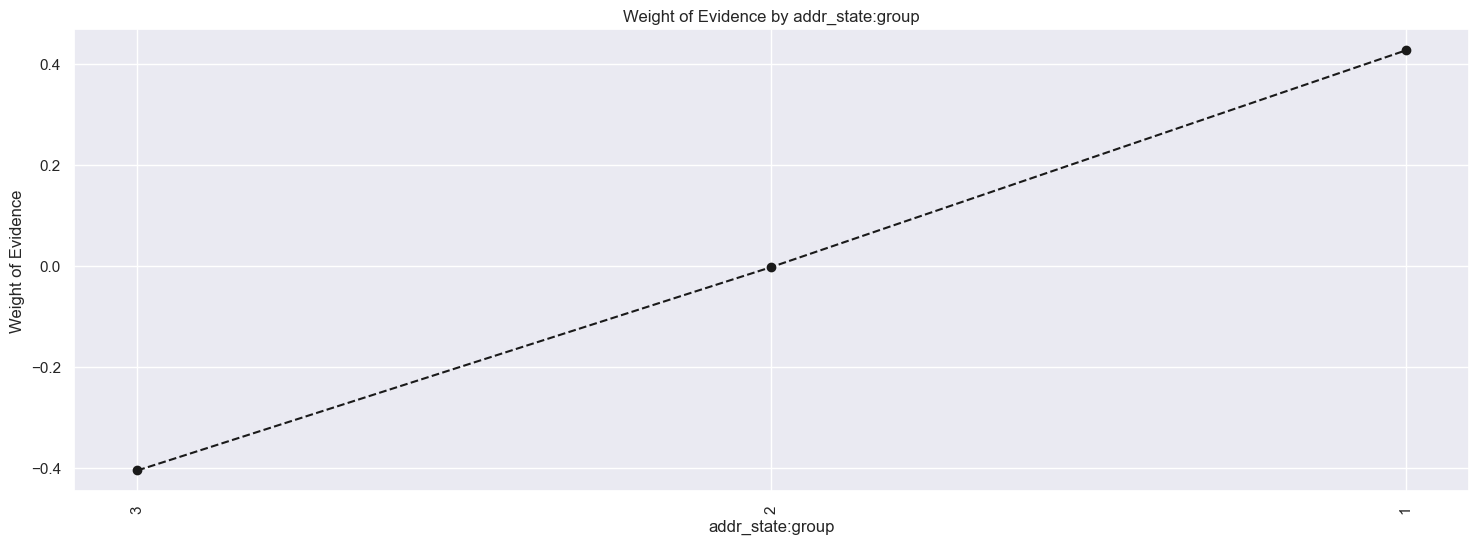

In [66]:
#graficamos de nuevo el woe de adress state

df_temp = woe_discrete(X_train, 'addr_state:group', y_train)
plot_by_woe(df_temp, 90)

## Seleccion de caracteristicas metodo final

Para llevar a cabo esta selección, se optará por el método de Eliminación Recursiva de Características (Recursive Feature Elimination, RFE). Esta técnica  ha demostrado ser comparable a diversas otras estrategias de selección de características en modelos de clasificación binaria de créditos\footnote{Jemai, J., \& Zarrad, A. 2023. "Feature Selection Engineering for Credit Risk Assessment in Retail Banking. Information"\cite{5}}. Este método consiste en eliminar las características que muestran menor importancia. El proceso de selección recursiva se basa en clasificar las características según su importancia en un modelo definido. De manera recursiva, el modelo se reconstruye utilizando las características restantes (inicialmente todas), y se eliminan los atributos menos importantes.En este trabajo, implementamos un algoritmo RFE denominado lrRFECV, basado en el modelo de regresión logística y utilizando técnicas de validación cruzada "kfold". Como algoritmo recursivo, el lrRFECV consume tiempo dependiendo del número de características evaluadas. Por lo tanto, en este estudio, el lrRFECV está precedido por el cálculo de la matriz de correlación de las características y la eliminación de aquellas altamente correlacionadas.

In [67]:
#Creamos un conjunto de datos con variables dummy y un conjunto de datos estandardizado

#Antes de continuar con el análisis, es necesario convertir las variables categóricas en numéricas, aplicando la técnica de codificación one-hot encoding
#con variables dummy


#Creamos una copia de nuestros datos sin la creación de variables dummy, para futuros análisis
X_train = X_train.copy()
y_train = y_train.copy()
X_test = X_test.copy()
y_test = y_test.copy()


def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        # Agregamos dtype=int para asegurarnos de que las dummies sean 0 y 1
        df_dummies.append(pd.get_dummies(df[col], prefix=col, prefix_sep=':', dtype=int))
    df_dummies = pd.concat(df_dummies, axis=1)
    df = pd.concat([df, df_dummies], axis=1)
    return df

columnas_objeto = X_train.select_dtypes(include=['object']).columns

# Aplicamos la función para test y train para mantener la misma estructura
X_train_dummy = dummy_creation(X_train, columnas_objeto)
X_test_dummy = dummy_creation(X_test, columnas_objeto)



#reindexamos los datos para evitar errores
'''
Esto es útil, por ejemplo, después de realizar una codificación "one-hot" o "dummy" en los conjuntos de entrenamiento y prueba.
Puede haber situaciones en las que algunas categorías estén presentes en X_train pero no en X_test y viceversa. 
Al reindexar, te aseguras de que ambas matrices tengan las mismas columnas en el mismo orden.
'''

X_test_dummy = X_test_dummy.reindex(labels=X_train_dummy.columns, axis=1, fill_value=0)

In [68]:

#Eliminamos las columnas objeto

columnas_objeto = X_train_dummy.select_dtypes(include=['object']).columns

X_train_dummy = X_train_dummy.drop(columns = columnas_objeto)

# Eliminamos las mismas columnas objeto de X_test_dummy
X_test_dummy = X_test_dummy.drop(columns = columnas_objeto)





In [69]:
#Estandarizamos los datos

# Estandarizamos los datos
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train_dummy)
X_train_est = minmax_scaler.transform(X_train_dummy)

# Aplicamos la misma transformación a X_test
X_test_est = minmax_scaler.transform(X_test_dummy)

In [70]:
#creamos una copia en formato df

X_train_est = pd.DataFrame(X_train_est, columns=X_train_dummy.columns)
X_test_est = pd.DataFrame(X_test_est, columns=X_test_dummy.columns)

In [71]:
#Creamos una copia de nuestros datos normalizados 
# Estandarizamos los datos para X_train
scaler = StandardScaler()
scaler.fit(X_train_dummy)
X_train_norm = scaler.transform(X_train_dummy)

# Aplicamos la misma transformación a X_test (NOTA: no vuelvas a hacer fit)
X_test_norm = scaler.transform(X_test_dummy)


In [72]:
#Creamos una copia de nuestros datos normalizados
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train_dummy.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test_dummy.columns)


In [73]:
X_train_norm=X_train_est
X_test_norm=X_test_est


In [74]:
# 1. Eliminación de Características Altamente Correlacionadas
# Calcular la matriz de correlación para el conjunto de entrenamiento balanceado
corr_matrix = X_train_norm.corr().abs()
threshold = 0.9

# Identificar y eliminar características altamente correlacionadas
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold:
            colname = corr_matrix.columns[i]  # Obtener el nombre de la columna
            to_drop.add(colname)

X_train_reduced = X_train_norm.drop(columns=to_drop, errors='ignore')

# 2. Aplicar RFE-CV con un Modelo de Regresión Logística
logreg = LogisticRegression()
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(10), scoring='roc_auc')
rfecv.fit(X_train_reduced, y_train)

# Las características seleccionadas están en rfecv.support_
selected_features = X_train_reduced.columns[rfecv.support_]

# Imprimir las características seleccionadas
print("Características seleccionadas: ", selected_features)


Características seleccionadas:  Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'fico_range_low', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'total_acc', 'initial_list_status', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_tl_120dpd_2m', 'num_tl_op_past_12m',
       'percent_bc_gt_75', 'total_bc_limit', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'purpose:car', 'purpose:credit_car

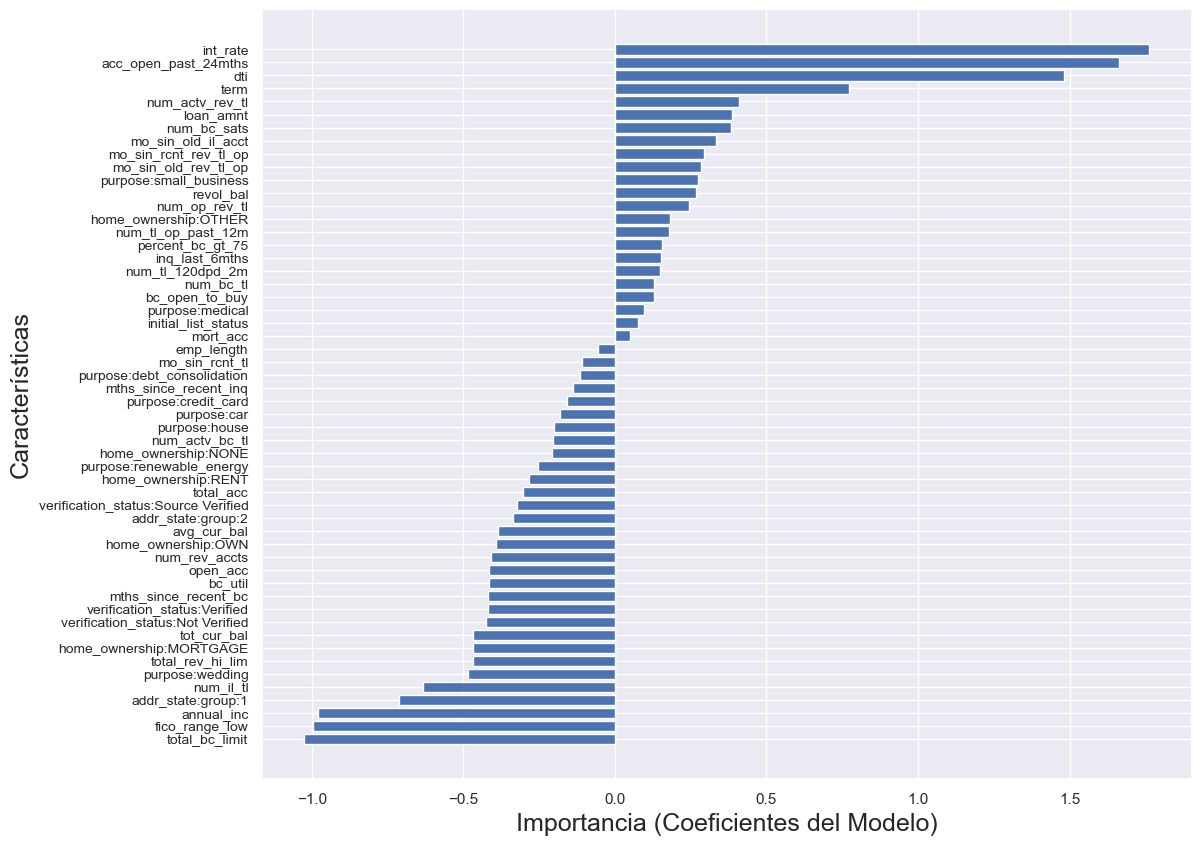

In [75]:


# Configuración global del tamaño de fuente
plt.rc('font', size=18)

# Obtener los coeficientes del modelo
coefficients = rfecv.estimator_.coef_[0]

# Emparejar cada coeficiente con su respectiva característica
feature_importance = zip(selected_features, coefficients)
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Separar nombres de características e importancia (coeficientes)
features, importances = zip(*feature_importance)

# Crear gráfico de barras
plt.figure(figsize=(12, 10))
plt.barh(features, importances)
plt.xlabel('Importancia (Coeficientes del Modelo)', fontsize=18)
plt.ylabel('Características', fontsize=18)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más importante en la parte superior
plt.show()


In [76]:
#dejamos solo las variables seleccionadas

X_train_norm=X_train_norm[selected_features]
X_test_norm=X_test_norm[selected_features]


# Prueba de Experimentos

## Eleccion del modelo inicial 

In [77]:
# obtenemos una muestra aleatoria de 20% de nuestros conjuntos de train y test 


X_sample, _, y_sample, _ = train_test_split(X_train_norm, y_train, test_size=0.2, stratify=y_train)


In [78]:


modelos = {
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(),
    'Ridge': RidgeClassifier(),
    #'MLP': MLPClassifier(),
    #'SVM': SVC(probability=True)  # Se agrega probability=True para habilitar predict_proba
}

def entrenar_evaluar_modelo(nombre, modelo, X_train_est, y_train, X_test_est, y_test, num_evaluaciones=1):
    accuracy_lista = []
    recall_lista = []
    roc_auc_lista = []
    tiempo_lista = []
    
    for _ in range(num_evaluaciones):
        try:
            start_time = time.time()
            
            modelo.fit(X_train_est, y_train)
            y_pred_class = modelo.predict(X_test_est)

            # Verificar la disponibilidad de predict_proba o decision_function
            if hasattr(modelo, "predict_proba"):
                y_pred_proba = modelo.predict_proba(X_test_est)[:, 1]
            elif hasattr(modelo, "decision_function"):
                y_pred_proba = modelo.decision_function(X_test_est)
            else:
                y_pred_proba = y_pred_class  # No ideal, pero una solución alternativa

            end_time = time.time()
            
            accuracy_lista.append(accuracy_score(y_test, y_pred_class))
            recall_lista.append(recall_score(y_test, y_pred_class))
            roc_auc_lista.append(roc_auc_score(y_test, y_pred_proba))
            tiempo_lista.append(end_time - start_time)
        
        except Exception as e:
            print(f"Error en el modelo {nombre}: {e}")
            # Manejar excepciones y continuar con el siguiente modelo
    
    return {
        'Modelo': nombre,
        'Accuracy': accuracy_lista,
        'Recall': recall_lista,
        'ROC-AUC': roc_auc_lista,
        'Tiempo Ejecucion': tiempo_lista,
    }

# Paralelizar el ciclo principal con 30 evaluaciones
num_evaluaciones = 5
resultados = Parallel(n_jobs=-1)(delayed(entrenar_evaluar_modelo)(nombre, modelo, X_sample, y_sample, X_test_norm, y_test, num_evaluaciones) for nombre, modelo in modelos.items())

df_resultados = pd.DataFrame(resultados)
print(df_resultados)


               Modelo                                           Accuracy  \
0        RandomForest  [0.8212569634550223, 0.8215249727204855, 0.822...   
1  LogisticRegression  [0.8215824032773704, 0.8215824032773704, 0.821...   
2        DecisionTree  [0.7252139288243965, 0.7285066140858013, 0.726...   
3             XGBoost  [0.8209315236326742, 0.8209315236326742, 0.820...   
4            AdaBoost  [0.8215632597584088, 0.8215632597584088, 0.821...   
5               Ridge  [0.8213526810498306, 0.8213526810498306, 0.821...   

                                              Recall  \
0  [0.05347650435891984, 0.05103125664469488, 0.0...   
1  [0.08494577928981502, 0.08494577928981502, 0.0...   
2  [0.29353604082500534, 0.29332341058898576, 0.2...   
3  [0.1090793110780353, 0.1090793110780353, 0.109...   
4  [0.06984903253242611, 0.06984903253242611, 0.0...   
5  [0.017860939825643206, 0.017860939825643206, 0...   

                                             ROC-AUC  \
0  [0.723763098899

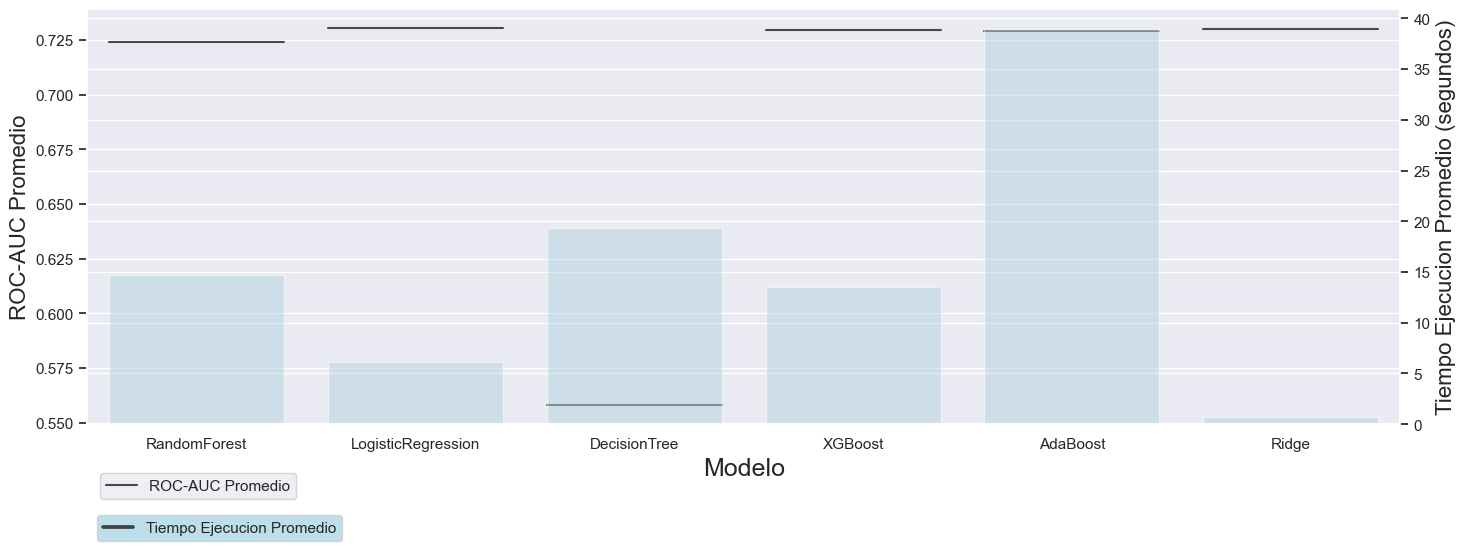

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Suponiendo que 'modelos' y 'resultados' están definidos en tu contexto
df_procesado = pd.DataFrame({
    'Modelo': [nombre for nombre in modelos.keys()],
    'ROC-AUC Promedio': [np.mean(resultados[i]['ROC-AUC']) for i in range(len(resultados))],
    'Tiempo Ejecucion Promedio': [np.mean(resultados[i]['Tiempo Ejecucion']) for i in range(len(resultados))]
})

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(15, 6))
ax1 = plt.gca()

# Gráfico de Violín para ROC-AUC
sns.violinplot(x='Modelo', y='ROC-AUC Promedio', data=df_procesado, ax=ax1)
ax1.set_xlabel('Modelo', fontsize=18)
ax1.set_ylabel('ROC-AUC Promedio', fontsize=16)

# Crear un segundo eje para el gráfico de barras
ax2 = ax1.twinx()

# Gráfico de barras para Tiempo de Ejecución
sns.barplot(x='Modelo', y='Tiempo Ejecucion Promedio', data=df_procesado, ax=ax2, alpha=0.5, color="lightblue")
ax2.set_ylabel('Tiempo Ejecucion Promedio (segundos)', fontsize=16)

# Ajustar la rotación de las etiquetas del eje X
plt.xticks(rotation=45, fontsize=10)

# Ajustar la posición de las leyendas para no tapar el gráfico
ax1.legend(['ROC-AUC Promedio'], loc='lower right', bbox_to_anchor=(.165, -.2))
ax2.legend(['Tiempo Ejecucion Promedio'], loc='lower right', bbox_to_anchor=(.2, -.3),facecolor='lightblue')

# Título del gráfico
plt.tight_layout()
plt.show()


In [80]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
from sklearn.metrics import make_scorer, roc_auc_score, log_loss
from sklearn.model_selection import GridSearchCV

def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

ks_scorer = make_scorer(ks_stat, needs_proba=True)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo de regresión logística
logistic_model = LogisticRegression()

# Definir el espacio de búsqueda de hiperparámetros
logistic_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [.001,.01,0.1, 1, 10, 100],
    'max_iter': [1000]
}

# Crear el objeto de búsqueda por grid search
logistic_search = GridSearchCV(logistic_model, logistic_params, cv=5, verbose=True,scoring=ks_scorer, n_jobs=-1)

# Ajustar la búsqueda a tus datos (X_train, y_train)
logistic_search.fit(X_sample, y_sample)

# Mejores hiperparámetros encontrados
print("Mejores Hiperparámetros para Regresión Logística:", logistic_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores Hiperparámetros para Regresión Logística: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


In [82]:
# usamos los mejor hiper parametros para entrenar el modelo

# Crear un modelo de regresión logística con los mejores hiperparámetros encontrados
logistic_model = LogisticRegression(**logistic_search.best_params_)
logistic_model.fit(X_train_norm, y_train)

# Predecir la probabilidad de incumplimiento
y_pred_proba = logistic_model.predict_proba(X_test_norm[X_sample.columns])[:, 1]

# Calcular el AUC
roc_auc_score(y_test, y_pred_proba)

0.7306638649973394

In [83]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Encontrar el umbral que maximiza los verdaderos positivos
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Umbral óptimo:", optimal_threshold)



Umbral óptimo: 0.1792880532119565


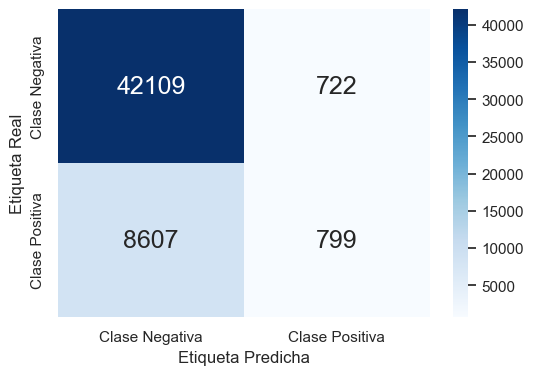

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay


# Crear la matriz de confusión con el umbral personalizado
conf_matrix_optimal = confusion_matrix(y_test, y_pred_proba >= .5)

# Usar Seaborn o Matplotlib para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Clase Negativa", "Clase Positiva"], 
            yticklabels=["Clase Negativa", "Clase Positiva"])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()




# Eliminacion de tome links

In [85]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_train_res, y_train_res = tl.fit_resample(X_train_norm, y_train)

# obtenemos una muestra aleatoria de 20% de nuestros conjuntos de train y test 


In [86]:
X_sample, _, y_sample, _ = train_test_split(X_train_res, y_train_res, test_size=0.3, stratify=y_train_res)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo de regresión logística
logistic_model = LogisticRegression()

# Definir el espacio de búsqueda de hiperparámetros
logistic_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [.001,.01,0.1, 1, 10, 100],
    'max_iter': [1000]
}

# Crear el objeto de búsqueda por grid search
logistic_search = GridSearchCV(logistic_model, logistic_params, cv=5, verbose=True,scoring=ks_scorer, n_jobs=-1)

# Ajustar la búsqueda a tus datos (X_train, y_train)
logistic_search.fit(X_sample, y_sample)

# Mejores hiperparámetros encontrados
print("Mejores Hiperparámetros para Regresión Logística:", logistic_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores Hiperparámetros para Regresión Logística: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo de regresión logística
logistic_model = LogisticRegression()

# Definir el espacio de búsqueda de hiperparámetros
logistic_params = {
    'penalty': [ 'l2'],
    'C': [.05,.1,.11,.12,.13,.14,.15,.16,.17,.18,.19,.2],
    'max_iter': [1000]
}

# Crear el objeto de búsqueda por grid search
logistic_search = GridSearchCV(logistic_model, logistic_params, cv=5, verbose=True,scoring=ks_scorer, n_jobs=-1)

# Ajustar la búsqueda a tus datos (X_train, y_train)
logistic_search.fit(X_sample, y_sample)

# Mejores hiperparámetros encontrados
print("Mejores Hiperparámetros para Regresión Logística:", logistic_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores Hiperparámetros para Regresión Logística: {'C': 0.2, 'max_iter': 1000, 'penalty': 'l2'}


In [89]:
# usamos los mejor hiper parametros para entrenar el modelo

# Crear un modelo de regresión logística con los mejores hiperparámetros encontrados
logistic_model = LogisticRegression(**logistic_search.best_params_)
logistic_model.fit(X_train_res, y_train_res)

# Predecir la probabilidad de incumplimiento
y_pred_proba = logistic_model.predict_proba(X_test_norm[X_sample.columns])[:, 1]

# Calcular el AUC
roc_auc_score(y_test, y_pred_proba)

0.7304847593576133

In [90]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve



# Primero, necesitas las predicciones de tu modelo
y_pred = logistic_model.predict(X_test_norm)
y_pred_proba = logistic_model.predict_proba(X_test_norm)[:, 1]

# Calculando diferentes métricas de error
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
ks = ks_stat(y_test, y_pred_proba)

# Imprimiendo las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Matriz de Confusión:\n", conf_matrix)
print("ROC AUC:", roc_auc)
print("KS:", ks)


Accuracy: 0.8206826578861727
Precision: 0.5089986155976004
Recall: 0.11726557516478843
F1-Score: 0.19061608917307526
Matriz de Confusión:
 [[41767  1064]
 [ 8303  1103]]
ROC AUC: 0.7304847593576133
KS: 0.339748522734668


In [92]:
#obtenemos las métricas para el conjunto de entrenamiento

# Primero, necesitas las predicciones de tu modelo
y_pred = logistic_model.predict(X_train_norm)
y_pred_proba = logistic_model.predict_proba(X_train_norm)[:, 1]


# Calculando diferentes métricas de error
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred_proba)
ks = ks_stat(y_train, y_pred_proba)

# Imprimiendo las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("KS:", ks)


Accuracy: 0.8208932365947509
Precision: 0.511646866992779
Recall: 0.11676057835424197
F1-Score: 0.1901320060592945
ROC AUC: 0.7317257671653095
KS: 0.33933963671698975


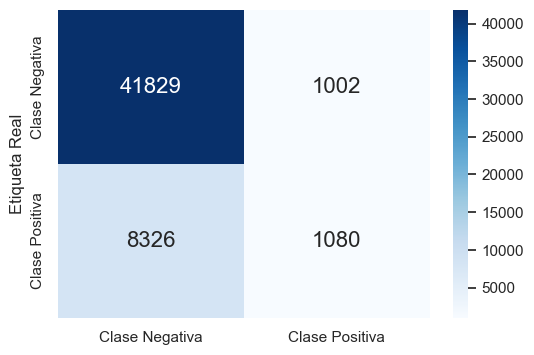

In [145]:


# Crear la matriz de confusión con el umbral personalizado
conf_matrix_optimal = confusion_matrix(y_test, y_pred_proba >= .5)

# Usar Seaborn o Matplotlib para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Clase Negativa", "Clase Positiva"], 
            yticklabels=["Clase Negativa", "Clase Positiva"])
plt.ylabel('Etiqueta Real')

plt.show()


In [96]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Encontrar el umbral que maximiza los verdaderos positivos
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Umbral óptimo:", optimal_threshold)



Umbral óptimo: 0.18144943783739517


In [97]:
def apply_threshold(probabilities, threshold):
    return (probabilities >= threshold).astype(int)

# Aplicar el umbral óptimo a las probabilidades predichas
y_pred_optimal = apply_threshold(y_pred_proba, optimal_threshold)


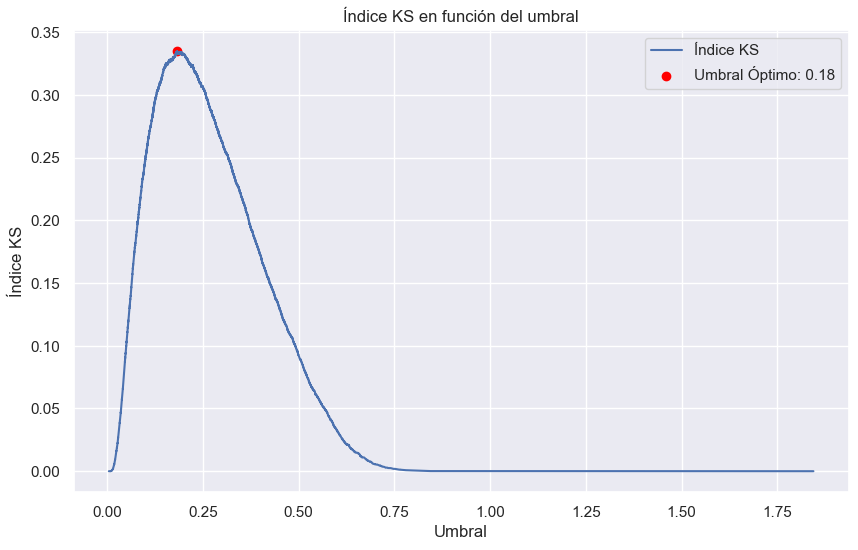

In [130]:


# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el índice KS para cada umbral
ks_values = tpr - fpr

# Encontrar el umbral que maximiza el KS
max_ks_idx = np.argmax(ks_values)
optimal_threshold_ks = thresholds[max_ks_idx]
max_ks_value = ks_values[max_ks_idx]

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar KS vs Thresholds
plt.plot(thresholds, ks_values, label='Índice KS')
plt.scatter(optimal_threshold_ks, max_ks_value, color='red', label=f'Umbral Óptimo: {optimal_threshold_ks:.2f}')

# Añadir detalles al gráfico
plt.title('Índice KS en función del umbral')
plt.xlabel('Umbral')
plt.ylabel('Índice KS')
plt.legend()
plt.grid(True)
plt.show()


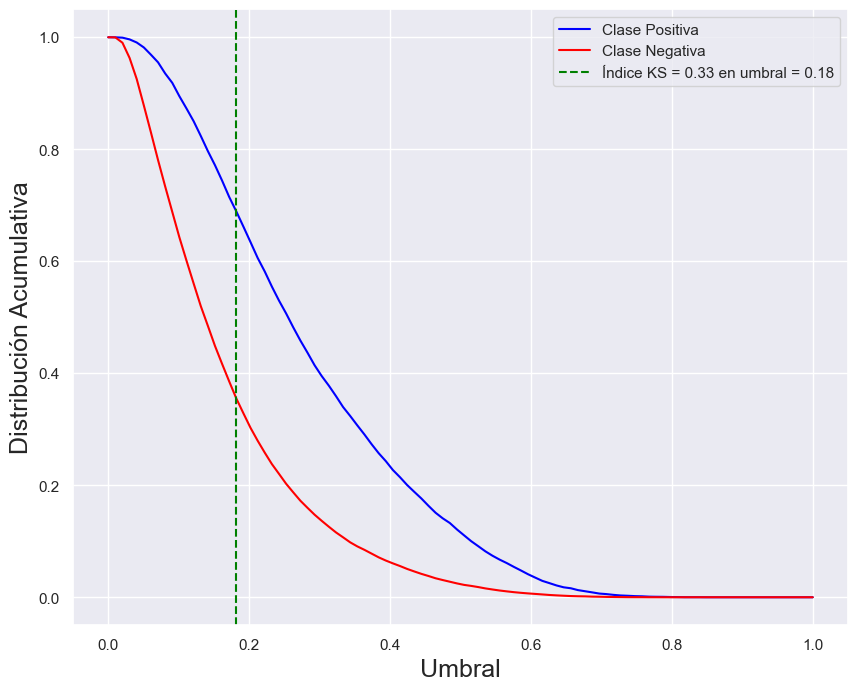

In [197]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del tamaño de fuente para todas las etiquetas
plt.rcParams.update({'font.size': 18})

# Separar las probabilidades predichas por clases reales
pos_prob = y_pred_proba[y_test == 1]
neg_prob = y_pred_proba[y_test == 0]

# Calcular las distribuciones acumulativas en cada umbral
thresholds = np.linspace(0, 1, 100)
pos_cum_dist = [np.mean(pos_prob >= t) for t in thresholds]
neg_cum_dist = [np.mean(neg_prob >= t) for t in thresholds]

# Encontrar el índice KS
ks_values = np.abs(np.array(pos_cum_dist) - np.array(neg_cum_dist))
ks_max = np.max(ks_values)
ks_index = np.argmax(ks_values)
ks_threshold = thresholds[ks_index]

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.plot(thresholds, pos_cum_dist, color='blue', label='Clase Positiva')
plt.plot(thresholds, neg_cum_dist, color='red', label='Clase Negativa')
plt.axvline(x=ks_threshold, color='green', linestyle='--', label=f'Índice KS = {ks_max:.2f} en umbral = {ks_threshold:.2f}')
plt.xlabel('Umbral',size=18)
plt.ylabel('Distribución Acumulativa',size=18)
#plt.title('Gráfico del Índice de Kolmogorov-Smirnov')
plt.legend()
plt.show()


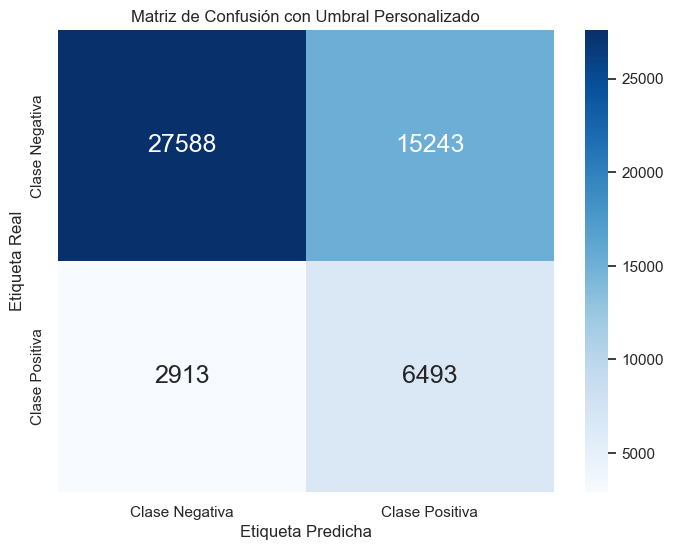

In [98]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión con el umbral personalizado
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)

# Usar Seaborn o Matplotlib para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Clase Negativa", "Clase Positiva"], 
            yticklabels=["Clase Negativa", "Clase Positiva"])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión con Umbral Personalizado')
plt.show()


In [1]:

import matplotlib.pyplot as plt
import shap

# Configuración de tamaño de fuente
plt.rcParams.update({'font.size': 16})

# Inicializar el explainer de SHAP con el modelo
explainer = shap.Explainer(logistic_model, X_train_res)

# Calcular los valores de SHAP para el conjunto de prueba
shap_values = explainer(X_test_norm)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Gráfico de resumen de SHAP
shap.summary_plot(shap_values, feature_names=X_sample.columns)


NameError: name 'logistic_model' is not defined